In [1]:
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn import ensemble
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
import re
import nltk
from wordcloud import WordCloud
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import time 
import contractions
from nltk.corpus import stopwords
from nltk.stem.porter import *
from sklearn.linear_model import LogisticRegression
from textblob import TextBlob
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing  import LabelEncoder


### Importing of Kaggle Repository Twitter Dataset

In this Classification Task, we are trying to train a model to classify our crawled dataset whether the tweets are subjective or objective, positive or negative sentiments

In [2]:
df_tweet = pd.read_csv("Tweet.csv")

In [3]:
df_tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3717964 entries, 0 to 3717963
Data columns (total 7 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   tweet_id     int64 
 1   writer       object
 2   post_date    int64 
 3   body         object
 4   comment_num  int64 
 5   retweet_num  int64 
 6   like_num     int64 
dtypes: int64(5), object(2)
memory usage: 198.6+ MB


In [4]:
df_tweet.head()

,tweet_id,writer,post_date,body,comment_num,retweet_num,like_num
0,550441509175443456,VisualStockRSRC,1420070457,"lx21 made $10,008 on $AAPL -Check it out! htt...",0,0,1
1,550441672312512512,KeralaGuy77,1420070496,Insanity of today weirdo massive selling. $aap...,0,0,0
2,550441732014223360,DozenStocks,1420070510,S&P100 #Stocks Performance $HD $LOW $SBUX $TGT...,0,0,0
3,550442977802207232,ShowDreamCar,1420070807,$GM $TSLA: Volkswagen Pushes 2014 Record Recal...,0,0,1
4,550443807834402816,i_Know_First,1420071005,Swing Trading: Up To 8.91% Return In 14 Days h...,0,0,1


In [5]:
df_company_tweet = pd.read_csv("Company_Tweet.csv")

In [6]:
df_company_tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4336445 entries, 0 to 4336444
Data columns (total 2 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   tweet_id       int64 
 1   ticker_symbol  object
dtypes: int64(1), object(1)
memory usage: 66.2+ MB


In [7]:
df_company_tweet.head()

,tweet_id,ticker_symbol
0,550803612197457920,AAPL
1,550803610825928706,AAPL
2,550803225113157632,AAPL
3,550802957370159104,AAPL
4,550802855129382912,AAPL


In [8]:
tweets = pd.merge(df_company_tweet,df_tweet,on= "tweet_id", how = "inner")

In [9]:
tweets.head()

,tweet_id,ticker_symbol,writer,post_date,body,comment_num,retweet_num,like_num
0,550803612197457920,AAPL,SentiQuant,1420156789,#TOPTICKERTWEETS $AAPL $IMRS $BABA $EBAY $AMZN...,0,0,1
1,550803612197457920,AMZN,SentiQuant,1420156789,#TOPTICKERTWEETS $AAPL $IMRS $BABA $EBAY $AMZN...,0,0,1
2,550803610825928706,AAPL,SentiQuant,1420156788,#SENTISHIFTUP $K $FB $GOOGL $GS $GOLD $T $AAPL...,0,0,1
3,550803610825928706,GOOGL,SentiQuant,1420156788,#SENTISHIFTUP $K $FB $GOOGL $GS $GOLD $T $AAPL...,0,0,1
4,550803610825928706,AMZN,SentiQuant,1420156788,#SENTISHIFTUP $K $FB $GOOGL $GS $GOLD $T $AAPL...,0,0,1


### Importing of Crawled Twitter Dataset

This is the crawled dataset from twitter with regards to stocks such as AAPL, AMZN, MSFT, TSLA, GOOGL

In [10]:
crawled_tweets = pd.read_csv('test_data.csv')

In [11]:
crawled_tweets.tail()

,ticker_symbol,post_date,tweet_id,writer,body,like_num,comment_num,retweet_num,tweet_activity,url_cnt,emoticons,emojis,emo_cnt,word_count,clean_text,subjectivity,sentiment,moderator,clean_text_no_stem_user
4293,TSLA,2023-02-28 23:25:43+00:00,1.630711e+18,BestTrader01,"$TSLA #TSLA Options Interest! $800sssss, 600ss...",59,7,5,71,1,[],{},0,10,tsla tsla option interest 800sssss 600sss 300s...,0,0.0,NaN,TSLA TSLA Options Interest 800sssss 600sss 300...
4294,TSLA,2023-02-28 23:23:40+00:00,1.630710e+18,MatchasmMatt,$RIVN down nearly 10% after earnings. These co...,84,10,2,96,0,[],{},0,10,rivn nearli 10 earn compani make tsla look goo...,1,0.0,NaN,RIVN nearly 10 earnings These companies making...
4295,TSLA,2023-02-28 23:20:10+00:00,1.630709e+18,susanblas,No surprise here. $TSLA does not give a flying...,39,0,11,50,0,[],{},0,8,surpris tsla give fli fuck custom theyv taken,1,-1.5,-1.0,No surprise TSLA give flying fuck customers th...
4296,TSLA,2023-02-28 23:12:27+00:00,1.630708e+18,stevenmarkryan,Is it just me or is it CREEPY AF that I get no...,267,37,7,311,0,[],{},0,23,creepi af get notif someon add list includ ad ...,1,-1.0,NaN,Is CREEPY AF I get notifications someone adds ...
4297,TSLA,2023-02-28 23:06:48+00:00,1.630706e+18,stevenmarkryan,Can't wait to see how pissed the cry babies wh...,289,16,15,320,0,[],{},0,31,cant wait see piss cri babi also tsla elonmusk...,1,-1.5,-1.0,Cant wait see pissed cry babies also TSLA elon...


In [12]:
remaining_data = pd.read_csv('remaining_data.csv')

In [13]:
remaining_data.head()

,ticker_symbol,post_date,tweet_id,writer,body,like_num,comment_num,retweet_num,tweet_activity,url_cnt,emoticons,emojis,emo_cnt,word_count,clean_text
0,APPL,2023-01-01 21:51:38+00:00,1609668699513839616,BalarezoCapital,$AAPL \n\nAAPL is in a DOWNTREND below all KMA...,9,0,3,12,1,[],{},0,16,aapl aapl downtrend kma high probabl continu l...
1,APPL,2023-01-01 21:31:03+00:00,1609663518265192448,DZierler,@Johnbenny101 I believe winning #VR #MixedReal...,6,1,3,10,0,[],{'✅': 5},5,41,johnbenny101 believ win vr mixedr ar display a...
2,APPL,2023-01-01 21:30:09+00:00,1609663291793747969,SPXTrades,Everyone is looking for $AAPL to fall into 95-...,20,2,1,23,1,[],{},0,33,everyon look aapl fall 95100 zone last bulwark...
3,APPL,2023-01-01 21:00:03+00:00,1609655716767318021,bullsonwallst,Current Berkshire Hathaway portfolio📊\n\nToo m...,11,1,3,15,1,[],{'📊': 1},1,7,current berkshir hathaway portfolioemojiplaceh...
4,APPL,2023-01-01 20:15:42+00:00,1609644555598438400,ThePupOfWallSt,#AAPL $AAPL Weekly Chart⁠\n⁠\nNotes on the cha...,14,1,5,20,1,[],{},0,9,aapl aapl weekli chart note chart courtesi tre...


In [14]:
def datasetInfo(dataset):
    print(f" Dataset Information and type \n {dataset.info()}")
    print("--------------------------------------------------------\n\n Data Types: ")
    print(dataset.dtypes)
    print("--------------------------------------------------------\n\n Rows and Columns: ")
    print(dataset.shape)
    print("--------------------------------------------------------\n\n Column Names: ")
    print(dataset.columns)
    print("--------------------------------------------------------\n\n Null Values: ")
    print(dataset.apply(lambda x: sum(x.isnull()) / len(dataset)))
    print("--------------------------------------------------------\n\n Unique Values: ")
    print(dataset.nunique())
    print("--------------------------------------------------------\n\n Describe: ")
    print(dataset.describe())

In [15]:
datasetInfo(tweets)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4336445 entries, 0 to 4336444
Data columns (total 8 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   tweet_id       int64 
 1   ticker_symbol  object
 2   writer         object
 3   post_date      int64 
 4   body           object
 5   comment_num    int64 
 6   retweet_num    int64 
 7   like_num       int64 
dtypes: int64(5), object(3)
memory usage: 297.8+ MB
 Dataset Information and type 
 None
--------------------------------------------------------

 Data Types: 
tweet_id          int64
ticker_symbol    object
writer           object
post_date         int64
body             object
comment_num       int64
retweet_num       int64
like_num          int64
dtype: object
--------------------------------------------------------

 Rows and Columns: 
(4336445, 8)
--------------------------------------------------------

 Column Names: 
Index(['tweet_id', 'ticker_symbol', 'writer', 'post_date', 'body',
       'comment_num

In [16]:
datasetInfo(remaining_data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3080 entries, 0 to 3079
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ticker_symbol   3080 non-null   object
 1   post_date       3080 non-null   object
 2   tweet_id        3080 non-null   int64 
 3   writer          3080 non-null   object
 4   body            3080 non-null   object
 5   like_num        3080 non-null   int64 
 6   comment_num     3080 non-null   int64 
 7   retweet_num     3080 non-null   int64 
 8   tweet_activity  3080 non-null   int64 
 9   url_cnt         3080 non-null   int64 
 10  emoticons       3080 non-null   object
 11  emojis          3080 non-null   object
 12  emo_cnt         3080 non-null   int64 
 13  word_count      3080 non-null   int64 
 14  clean_text      3080 non-null   object
dtypes: int64(8), object(7)
memory usage: 361.1+ KB
 Dataset Information and type 
 None
--------------------------------------------------------

In [17]:
datasetInfo(crawled_tweets)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4298 entries, 0 to 4297
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ticker_symbol            4298 non-null   object 
 1   post_date                4298 non-null   object 
 2   tweet_id                 4298 non-null   float64
 3   writer                   4298 non-null   object 
 4   body                     4298 non-null   object 
 5   like_num                 4298 non-null   int64  
 6   comment_num              4298 non-null   int64  
 7   retweet_num              4298 non-null   int64  
 8   tweet_activity           4298 non-null   int64  
 9   url_cnt                  4298 non-null   int64  
 10  emoticons                4298 non-null   object 
 11  emojis                   4298 non-null   object 
 12  emo_cnt                  4298 non-null   int64  
 13  word_count               4298 non-null   int64  
 14  clean_text              

In [18]:
crawled_tweets.head()

,ticker_symbol,post_date,tweet_id,writer,body,like_num,comment_num,retweet_num,tweet_activity,url_cnt,emoticons,emojis,emo_cnt,word_count,clean_text,subjectivity,sentiment,moderator,clean_text_no_stem_user
0,AAPL,2023-01-01 22:23:31+00:00,1.609677e+18,David_Tracey,Things are going to get very interesting but w...,27,1,2,30,2,[],{},0,11,thing go get interest q1 forecast updat aapl r...,0,0.0,NaN,Things going get interesting My Q1 forecast So...
1,AAPL,2023-01-01 21:04:45+00:00,1.609657e+18,ASTS_Investors,Happy New Year SpaceMob! \n\nLet's hope 2023 w...,64,0,3,67,1,[],"{'🚀': 1, '🤠': 1}",2,21,happi new year spacemob let hope 2023 year blu...,1,1.0,NaN,Happy New Year SpaceMob Lets hope 2023 year Bl...
2,AAPL,2023-01-01 20:44:51+00:00,1.609652e+18,BigCheds,$AAPL Apple weekly chart - hammer candle with ...,104,9,5,118,1,[],{},0,10,aapl appl weekli chart hammer candl spring jun...,0,0.0,NaN,AAPL Apple weekly chart hammer candle spring J...
3,AAPL,2023-01-01 19:45:30+00:00,1.609637e+18,ThetaWarrior,$AAPL Yearly -26.8% https://t.co/SewErQmOPE,80,10,10,100,1,[],{},0,4,aapl yearli 268,0,0.0,NaN,AAPL Yearly 268
4,AAPL,2023-01-01 19:00:00+00:00,1.609626e+18,TrendSpider,Looking for shorts into the new year? 📉\n\nThi...,28,4,4,36,1,[],{'📉': 1},1,23,look short new year weekli triangl breakdown s...,1,1.0,NaN,Looking shorts new year This weekly triangle b...


After Merging Remove the dataframes that columns are empty

In [19]:
tweets.dropna(inplace = True)

Refactoring the Polarity Values of testing crawled_tweets

In [20]:
crawled_tweets.loc[crawled_tweets['sentiment'] >= 0.5, 'sentiment'] = 1
crawled_tweets.loc[crawled_tweets['sentiment'] <= -0.5, 'sentiment'] = -1

In [21]:
crawled_tweets.head()

,ticker_symbol,post_date,tweet_id,writer,body,like_num,comment_num,retweet_num,tweet_activity,url_cnt,emoticons,emojis,emo_cnt,word_count,clean_text,subjectivity,sentiment,moderator,clean_text_no_stem_user
0,AAPL,2023-01-01 22:23:31+00:00,1.609677e+18,David_Tracey,Things are going to get very interesting but w...,27,1,2,30,2,[],{},0,11,thing go get interest q1 forecast updat aapl r...,0,0.0,NaN,Things going get interesting My Q1 forecast So...
1,AAPL,2023-01-01 21:04:45+00:00,1.609657e+18,ASTS_Investors,Happy New Year SpaceMob! \n\nLet's hope 2023 w...,64,0,3,67,1,[],"{'🚀': 1, '🤠': 1}",2,21,happi new year spacemob let hope 2023 year blu...,1,1.0,NaN,Happy New Year SpaceMob Lets hope 2023 year Bl...
2,AAPL,2023-01-01 20:44:51+00:00,1.609652e+18,BigCheds,$AAPL Apple weekly chart - hammer candle with ...,104,9,5,118,1,[],{},0,10,aapl appl weekli chart hammer candl spring jun...,0,0.0,NaN,AAPL Apple weekly chart hammer candle spring J...
3,AAPL,2023-01-01 19:45:30+00:00,1.609637e+18,ThetaWarrior,$AAPL Yearly -26.8% https://t.co/SewErQmOPE,80,10,10,100,1,[],{},0,4,aapl yearli 268,0,0.0,NaN,AAPL Yearly 268
4,AAPL,2023-01-01 19:00:00+00:00,1.609626e+18,TrendSpider,Looking for shorts into the new year? 📉\n\nThi...,28,4,4,36,1,[],{'📉': 1},1,23,look short new year weekli triangl breakdown s...,1,1.0,NaN,Looking shorts new year This weekly triangle b...


Convert our tweet date_time into just date

In [22]:
tweets['post_date'] = pd.to_datetime(tweets["post_date"],utc = False , unit = 's',).dt.normalize()
tweets['post_date'] = tweets["post_date"].dt.date
tweets.head()

,tweet_id,ticker_symbol,writer,post_date,body,comment_num,retweet_num,like_num
0,550803612197457920,AAPL,SentiQuant,2015-01-01,#TOPTICKERTWEETS $AAPL $IMRS $BABA $EBAY $AMZN...,0,0,1
1,550803612197457920,AMZN,SentiQuant,2015-01-01,#TOPTICKERTWEETS $AAPL $IMRS $BABA $EBAY $AMZN...,0,0,1
2,550803610825928706,AAPL,SentiQuant,2015-01-01,#SENTISHIFTUP $K $FB $GOOGL $GS $GOLD $T $AAPL...,0,0,1
3,550803610825928706,GOOGL,SentiQuant,2015-01-01,#SENTISHIFTUP $K $FB $GOOGL $GS $GOLD $T $AAPL...,0,0,1
4,550803610825928706,AMZN,SentiQuant,2015-01-01,#SENTISHIFTUP $K $FB $GOOGL $GS $GOLD $T $AAPL...,0,0,1


In [23]:
crawled_tweets['post_date'] = pd.to_datetime(crawled_tweets['post_date'])
crawled_tweets['post_date'] = crawled_tweets['post_date'].dt.date

We need to differentiate active tweets which are more "Reputable" compared to botting tweets or spams. <br>
Activities can be defined as comments/replies, retweets, and likes.

In [24]:
tweets.sort_values(by = "comment_num" , ascending  = False, inplace = True)
tweets


,tweet_id,ticker_symbol,writer,post_date,body,comment_num,retweet_num,like_num
3786974,1014983757252780033,TSLA,lopezlinette,2018-07-05,"I’d just like to point out that right now, rig...",631,369,0
4112626,1118989675257978880,TSLA,GerberKawasaki,2019-04-18,"If a Tesla saves you $200 a month on gas, you ...",567,0,0
4306536,1199424478536753155,TSLA,AlexSibila,2019-11-26,~Tesla feature request thread~Feel free to rep...,563,48,662
2823018,885933344487342082,AMZN,internet_dust,2017-07-14,"""I sell books."" versus ""I sell whatever the fu...",496,0,0
4182686,1138975188127834112,TSLA,TeslaNY,2019-06-13,“I think it's basically financially insane to ...,442,0,0
...,...,...,...,...,...,...,...,...
1488123,1060565704389378055,AAPL,ScottSegen,2018-11-08,Mark Zuckerberg turns down UK parliament reque...,0,0,1
1488124,1060565704389378055,GOOGL,ScottSegen,2018-11-08,Mark Zuckerberg turns down UK parliament reque...,0,0,1
1488125,1060566279818366977,AAPL,jordanladz,2018-11-08,Get audible updates with this new application....,0,0,0
1488126,1060566346763849735,AAPL,CompoundFreedom,2018-11-08,Apple Opens First Store in Thailand Saturday h...,0,0,0


The tweet activities will be defined by the summation of all comments/replies, likes and retweets to differentiate from bots or spams, where tweets are more "usable" for sentimental analysis

In [25]:
tweets["tweet_activity"] = tweets["comment_num"] + tweets["like_num"] + tweets["retweet_num"]
tweets

,tweet_id,ticker_symbol,writer,post_date,body,comment_num,retweet_num,like_num,tweet_activity
3786974,1014983757252780033,TSLA,lopezlinette,2018-07-05,"I’d just like to point out that right now, rig...",631,369,0,1000
4112626,1118989675257978880,TSLA,GerberKawasaki,2019-04-18,"If a Tesla saves you $200 a month on gas, you ...",567,0,0,567
4306536,1199424478536753155,TSLA,AlexSibila,2019-11-26,~Tesla feature request thread~Feel free to rep...,563,48,662,1273
2823018,885933344487342082,AMZN,internet_dust,2017-07-14,"""I sell books."" versus ""I sell whatever the fu...",496,0,0,496
4182686,1138975188127834112,TSLA,TeslaNY,2019-06-13,“I think it's basically financially insane to ...,442,0,0,442
...,...,...,...,...,...,...,...,...,...
1488123,1060565704389378055,AAPL,ScottSegen,2018-11-08,Mark Zuckerberg turns down UK parliament reque...,0,0,1,1
1488124,1060565704389378055,GOOGL,ScottSegen,2018-11-08,Mark Zuckerberg turns down UK parliament reque...,0,0,1,1
1488125,1060566279818366977,AAPL,jordanladz,2018-11-08,Get audible updates with this new application....,0,0,0,0
1488126,1060566346763849735,AAPL,CompoundFreedom,2018-11-08,Apple Opens First Store in Thailand Saturday h...,0,0,0,0


### Filter Tweets that are >= 50 activities

In [26]:
filterTweets = tweets.loc[tweets["tweet_activity"] > 50]

In [27]:
filterTweets.head()

,tweet_id,ticker_symbol,writer,post_date,body,comment_num,retweet_num,like_num,tweet_activity
3786974,1014983757252780033,TSLA,lopezlinette,2018-07-05,"I’d just like to point out that right now, rig...",631,369,0,1000
4112626,1118989675257978880,TSLA,GerberKawasaki,2019-04-18,"If a Tesla saves you $200 a month on gas, you ...",567,0,0,567
4306536,1199424478536753155,TSLA,AlexSibila,2019-11-26,~Tesla feature request thread~Feel free to rep...,563,48,662,1273
2823018,885933344487342082,AMZN,internet_dust,2017-07-14,"""I sell books."" versus ""I sell whatever the fu...",496,0,0,496
4182686,1138975188127834112,TSLA,TeslaNY,2019-06-13,“I think it's basically financially insane to ...,442,0,0,442


### Data Cleaning and Tokenization of text body

In [28]:
# Function to remove stopwords (common english stopwords from nltk)
def removeStopWords(df):
    finalList = []
    stop_words = set(stopwords.words('english'))
    for word in df:
        if word not in stop_words:
            finalList.append(word)
    df = finalList
    return df

In [29]:
# Function to stem tweets 
def stem_text(text):
    
    stemmer = PorterStemmer()
   
    return [stemmer.stem(word) for word in text]

In [30]:
# Function to lemmatise tweets
def lemmatised_text(text):
    lemmatiser = nltk.stem.WordNetLemmatizer()
    return [lemmatiser.lemmatize(word) for word in text]

In [31]:
def replace_contractions(text):
    expanded_text = contractions.fix(text)
    return expanded_text

In [32]:
def clean_dataframe_text(df, column,lemma):
    
    # Define regex pattern to match URLs
    url_pattern = r"https?://\S+"
    
    # Remove URLs from text column
    df[column] = df[column].str.replace(url_pattern, "", regex=True)
    
    
    
    df[column] = df[column].apply(lambda x: replace_contractions(x))
    # df[column] = df[column].apply(lambda x: re.sub(r"(\w+)'d", lambda m: 'would' if m.group(1) in ['he', 'she', 'it', 'that'] else 'had', x))
    
    # # Replace 's with 'is' or 'has'
    # df[column] = df[column].apply(lambda x: re.sub(r"(\w+)'s", lambda m: 'is' if m.group(1) in ['he', 'she', 'it'] else 'has', x))
    
    # Remove any non-alphanumeric characters and replace them with spaces
    df[column] = df[column].apply(lambda x: re.sub(r'[^\w\s]', '', x))
    
    # Replace any consecutive whitespace characters with a single space
    df[column] = df[column].apply(lambda x: re.sub(r'\s+', ' ', x))
    
    # Remove not word characters
    df[column] = df[column].apply(lambda x: re.sub(r'[^\w\s]', ' ', x))
    
       
    # Remove digits 
    df[column] = df[column].apply(lambda x: re.sub(r'\d+', '', x))
    
    # Convert the string in lower
    df[column] = df[column].str.lower()
    
    # Tokenised the words
    df[column]  = df[column].apply(lambda x : nltk.word_tokenize(x))

    # Remove stopwords from the NLTK stopword list
    df[column] = df[column].apply(lambda x : removeStopWords(x))
    
    if lemma:
    # lemmatised the text
        df[column] = df[column].apply(lambda x : lemmatised_text(x))
    else:
    # Stemmed the text
        df[column] = df[column].apply(lambda x : stem_text(x))
    #concatenate the tokenised list into string
    df[column] = df[column].apply(lambda x: ' '.join(x))
    
      
    return df

In [33]:
# Tweets that are cleaned and lemmatised
filterTweetsLemma = filterTweets.copy()
filterTweetsLemma['clean_text'] = filterTweetsLemma['body']
filterTweetsLemma = clean_dataframe_text(filterTweetsLemma,"clean_text",True)
filterTweetsLemma.head()

,tweet_id,ticker_symbol,writer,post_date,body,comment_num,retweet_num,like_num,tweet_activity,clean_text
3786974,1014983757252780033,TSLA,lopezlinette,2018-07-05,"I’d just like to point out that right now, rig...",631,369,0,1000,would like point right right moment elonmusk g...
4112626,1118989675257978880,TSLA,GerberKawasaki,2019-04-18,"If a Tesla saves you $200 a month on gas, you ...",567,0,0,567,tesla save month gas ten year take saving put ...
4306536,1199424478536753155,TSLA,AlexSibila,2019-11-26,~Tesla feature request thread~Feel free to rep...,563,48,662,1273,tesla feature request threadfeel free reply co...
2823018,885933344487342082,AMZN,internet_dust,2017-07-14,"""I sell books."" versus ""I sell whatever the fu...",496,0,0,496,sell book versus sell whatever fuck want amzn
4182686,1138975188127834112,TSLA,TeslaNY,2019-06-13,“I think it's basically financially insane to ...,442,0,0,442,think basically financially insane buy anythin...


In [34]:
# Tweets that are cleaned and stemmed
filterTweets['clean_text'] = filterTweets['body'] 
filterTweets = clean_dataframe_text(filterTweets,"clean_text",False)
filterTweets.head()

C:\Users\eric2\AppData\Local\Temp\ipykernel_30412\495612401.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filterTweets['clean_text'] = filterTweets['body']
C:\Users\eric2\AppData\Local\Temp\ipykernel_30412\2062367621.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = df[column].str.replace(url_pattern, "", regex=True)
C:\Users\eric2\AppData\Local\Temp\ipykernel_30412\2062367621.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .l

,tweet_id,ticker_symbol,writer,post_date,body,comment_num,retweet_num,like_num,tweet_activity,clean_text
3786974,1014983757252780033,TSLA,lopezlinette,2018-07-05,"I’d just like to point out that right now, rig...",631,369,0,1000,would like point right right moment elonmusk g...
4112626,1118989675257978880,TSLA,GerberKawasaki,2019-04-18,"If a Tesla saves you $200 a month on gas, you ...",567,0,0,567,tesla save month ga ten year take save put bal...
4306536,1199424478536753155,TSLA,AlexSibila,2019-11-26,~Tesla feature request thread~Feel free to rep...,563,48,662,1273,tesla featur request threadfeel free repli con...
2823018,885933344487342082,AMZN,internet_dust,2017-07-14,"""I sell books."" versus ""I sell whatever the fu...",496,0,0,496,sell book versu sell whatev fuck want amzn
4182686,1138975188127834112,TSLA,TeslaNY,2019-06-13,“I think it's basically financially insane to ...,442,0,0,442,think basic financi insan buy anyth except ele...


In [35]:
crawled_tweets = crawled_tweets[2146:2548]

In [36]:
crawled_tweets['clean_text'] = crawled_tweets['body']
crawled_tweets = clean_dataframe_text(crawled_tweets,"clean_text",False)

In [37]:
filterTweets["clean_text"].head()

3786974    would like point right right moment elonmusk g...
4112626    tesla save month ga ten year take save put bal...
4306536    tesla featur request threadfeel free repli con...
2823018           sell book versu sell whatev fuck want amzn
4182686    think basic financi insan buy anyth except ele...
Name: clean_text, dtype: object

In [38]:
crawled_tweets["clean_text"].head()

2146    break googl googl invest million chatgpt rival...
2147               googl report earn miss revenu ep googl
2148    nflx say doubl ad tier meta secur ad spend cus...
2149    quick highlight tool use platform start build ...
2150    today h spanish time momentumfinanc channel ta...
Name: clean_text, dtype: object

### Tweet EDA

In [39]:
filterTweets["writer"].describe()


count           41625
unique           2797
top       TESLAcharts
freq             2212
Name: writer, dtype: object

In [40]:
crawled_tweets["writer"].describe()

count              402
unique             231
top       MarketRebels
freq                14
Name: writer, dtype: object

### Writer Data Exploration

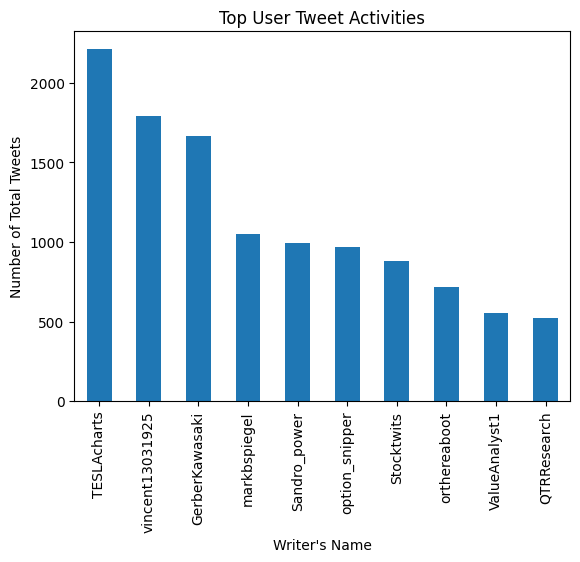

In [41]:

counts = filterTweets["writer"].value_counts(ascending= False)
countsFilter = counts[:10]
countsFilter.plot(kind="bar")

plt.title("Top User Tweet Activities")
plt.ylabel("Number of Total Tweets")
plt.xlabel("Writer's Name")
plt.show()

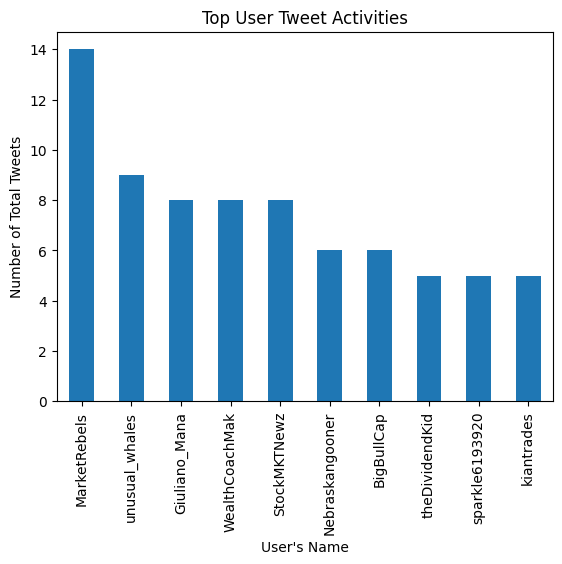

In [42]:
counts = crawled_tweets["writer"].value_counts(ascending= False)
countsFilter = counts[:10]
countsFilter.plot(kind="bar")

plt.title("Top User Tweet Activities")
plt.ylabel("Number of Total Tweets")
plt.xlabel("User's Name")
plt.show()

Graph above shows active users/writers

<AxesSubplot: ylabel='ticker_symbol'>

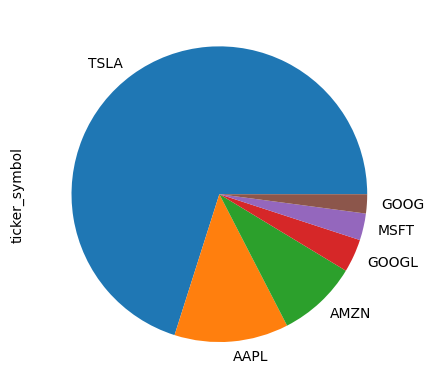

In [43]:
counts = filterTweets["ticker_symbol"].value_counts()
counts.plot(kind="pie")

<AxesSubplot: ylabel='ticker_symbol'>

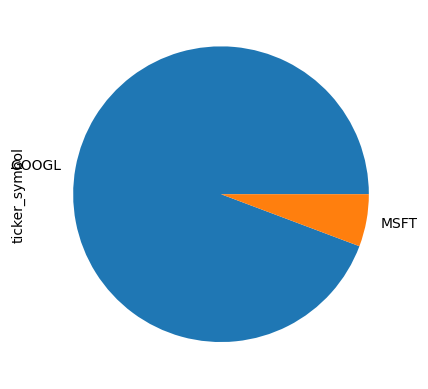

In [44]:
counts = crawled_tweets["ticker_symbol"].value_counts()
counts.plot(kind="pie")

Notice that there are more TSLA tweets in the dataset.

### Active Tweets dates

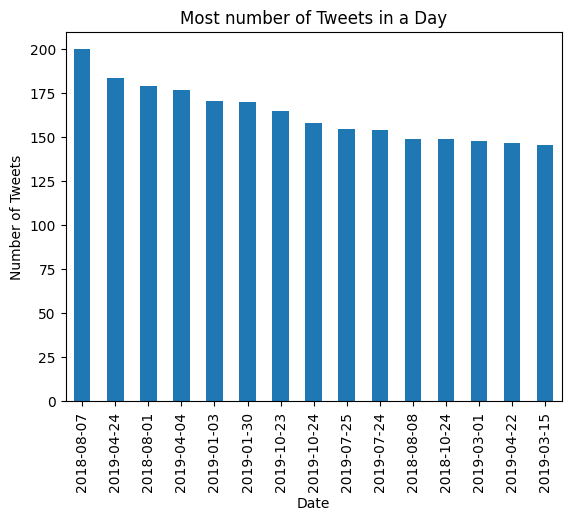

In [45]:
count = filterTweets["post_date"].value_counts(ascending = False)
count
filterCounts = count[:15]
filterCounts.plot(kind = "bar")
plt.title("Most number of Tweets in a Day")
plt.ylabel("Number of Tweets")
plt.xlabel("Date")
plt.show()

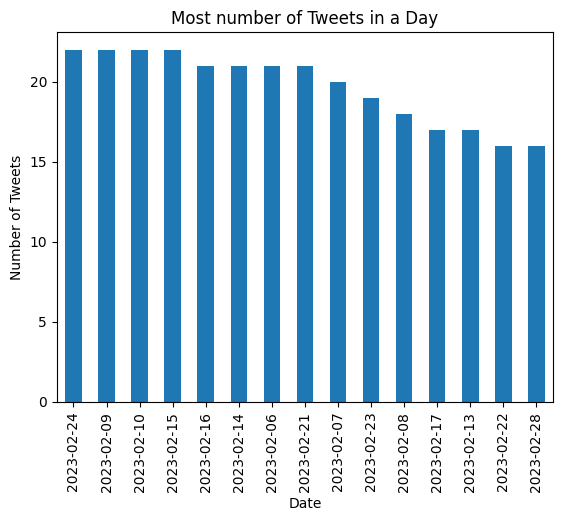

In [46]:
count = crawled_tweets["post_date"].value_counts(ascending = False)
count
filterCounts = count[:15]
filterCounts.plot(kind = "bar")
plt.title("Most number of Tweets in a Day")
plt.ylabel("Number of Tweets")
plt.xlabel("Date")
plt.show()

Above bar graphs shows the highest tweets in the respective days

### Word Cloud of Tweets

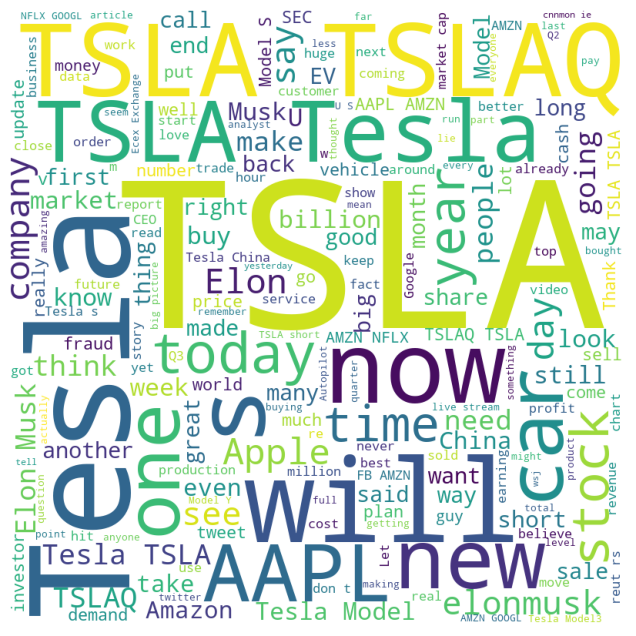

In [47]:
text = " ".join(filterTweets["body"])
wordcloud = WordCloud(width = 800, height = 800, background_color='white', max_words = 200)
wordcloud.generate(text)

plt.figure(figsize=(8, 8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

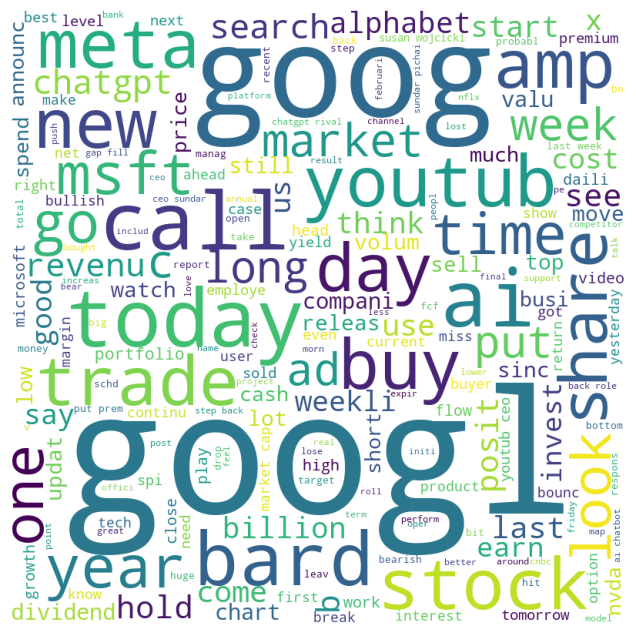

In [48]:
text = " ".join(crawled_tweets["clean_text"])
wordcloud = WordCloud(width = 800, height = 800, background_color='white', max_words = 200)
wordcloud.generate(text)

plt.figure(figsize=(8, 8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

From the word cloud we can tell that tsla aapl msft are common tweets in Twitter

# Polarity Detection

### Subjectivity and Polarity Analysis using Textblob

In [49]:
# Function to use TextBlob (Sentimental Analysis [Objectivity & Polarity])

def add_sentiment_scores_blob(df, text_column, polarity_threshold = 0.0 , subjectivity_threshold = 0.5):
    # Compute polarity and subjectivity scores for each row in the specified text column
    scores = df[text_column].apply(lambda x: TextBlob(x).sentiment)
    
    # Add two new columns to the DataFrame for the polarity and subjectivity scores
    df['blob_polarity'] = scores.apply(lambda x: x.polarity)
    df['blob_subjectivity'] = scores.apply(lambda x: x.subjectivity)
    
    # Convert polarity score to class (positive, neutral, or negative) based on the specified threshold
    df['blob_polarity'] = df['blob_polarity'].apply(lambda x: 'Positive' if x > polarity_threshold else 'Negative' if x < -polarity_threshold else 'Neutral')
    
    # Convert subjectivity score to class (subjective or objective) based on the specified threshold
    df['blob_subjectivity'] = df['blob_subjectivity'].apply(lambda x: 'Subjective' if x > subjectivity_threshold else 'Objective')
    
    return df
    
    

In [50]:
add_sentiment_scores_blob(filterTweets,"body", 0.0, 0.5)
filterTweets.head()

C:\Users\eric2\AppData\Local\Temp\ipykernel_30412\2951990553.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['blob_polarity'] = scores.apply(lambda x: x.polarity)
C:\Users\eric2\AppData\Local\Temp\ipykernel_30412\2951990553.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['blob_subjectivity'] = scores.apply(lambda x: x.subjectivity)
C:\Users\eric2\AppData\Local\Temp\ipykernel_30412\2951990553.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try 

,tweet_id,ticker_symbol,writer,post_date,body,comment_num,retweet_num,like_num,tweet_activity,clean_text,blob_polarity,blob_subjectivity
3786974,1014983757252780033,TSLA,lopezlinette,2018-07-05,"I’d just like to point out that right now, rig...",631,369,0,1000,would like point right right moment elonmusk g...,Positive,Objective
4112626,1118989675257978880,TSLA,GerberKawasaki,2019-04-18,"If a Tesla saves you $200 a month on gas, you ...",567,0,0,567,tesla save month ga ten year take save put bal...,Positive,Objective
4306536,1199424478536753155,TSLA,AlexSibila,2019-11-26,~Tesla feature request thread~Feel free to rep...,563,48,662,1273,tesla featur request threadfeel free repli con...,Positive,Subjective
2823018,885933344487342082,AMZN,internet_dust,2017-07-14,"""I sell books."" versus ""I sell whatever the fu...",496,0,0,496,sell book versu sell whatev fuck want amzn,Negative,Subjective
4182686,1138975188127834112,TSLA,TeslaNY,2019-06-13,“I think it's basically financially insane to ...,442,0,0,442,think basic financi insan buy anyth except ele...,Negative,Objective


In [51]:
add_sentiment_scores_blob(filterTweetsLemma,"clean_text", 0.0, 0.5)
filterTweetsLemma.head()

,tweet_id,ticker_symbol,writer,post_date,body,comment_num,retweet_num,like_num,tweet_activity,clean_text,blob_polarity,blob_subjectivity
3786974,1014983757252780033,TSLA,lopezlinette,2018-07-05,"I’d just like to point out that right now, rig...",631,369,0,1000,would like point right right moment elonmusk g...,Positive,Subjective
4112626,1118989675257978880,TSLA,GerberKawasaki,2019-04-18,"If a Tesla saves you $200 a month on gas, you ...",567,0,0,567,tesla save month gas ten year take saving put ...,Positive,Objective
4306536,1199424478536753155,TSLA,AlexSibila,2019-11-26,~Tesla feature request thread~Feel free to rep...,563,48,662,1273,tesla feature request threadfeel free reply co...,Positive,Subjective
2823018,885933344487342082,AMZN,internet_dust,2017-07-14,"""I sell books."" versus ""I sell whatever the fu...",496,0,0,496,sell book versus sell whatever fuck want amzn,Negative,Subjective
4182686,1138975188127834112,TSLA,TeslaNY,2019-06-13,“I think it's basically financially insane to ...,442,0,0,442,think basically financially insane buy anythin...,Negative,Subjective


### Convert Positive, Negative and Neutral to numeral labels and Subjectivity

In [52]:
sentiment_map = ["Negative", "Neutral","Positive"]
subjectivity_mapping = {"Subjective": 1, "Objective": 0}


In [53]:


filterTweets["blob_subjectivity"].replace(subjectivity_mapping, inplace = True)
filterTweets = pd.get_dummies(filterTweets, columns = ["blob_polarity"])
filterTweets.head()

C:\Users\eric2\AppData\Local\Temp\ipykernel_30412\707693292.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filterTweets["blob_subjectivity"].replace(subjectivity_mapping, inplace = True)


,tweet_id,ticker_symbol,writer,post_date,body,comment_num,retweet_num,like_num,tweet_activity,clean_text,blob_subjectivity,blob_polarity_Negative,blob_polarity_Neutral,blob_polarity_Positive
3786974,1014983757252780033,TSLA,lopezlinette,2018-07-05,"I’d just like to point out that right now, rig...",631,369,0,1000,would like point right right moment elonmusk g...,0,0,0,1
4112626,1118989675257978880,TSLA,GerberKawasaki,2019-04-18,"If a Tesla saves you $200 a month on gas, you ...",567,0,0,567,tesla save month ga ten year take save put bal...,0,0,0,1
4306536,1199424478536753155,TSLA,AlexSibila,2019-11-26,~Tesla feature request thread~Feel free to rep...,563,48,662,1273,tesla featur request threadfeel free repli con...,1,0,0,1
2823018,885933344487342082,AMZN,internet_dust,2017-07-14,"""I sell books."" versus ""I sell whatever the fu...",496,0,0,496,sell book versu sell whatev fuck want amzn,1,1,0,0
4182686,1138975188127834112,TSLA,TeslaNY,2019-06-13,“I think it's basically financially insane to ...,442,0,0,442,think basic financi insan buy anyth except ele...,0,1,0,0


In [54]:

filterTweetsLemma = pd.get_dummies(filterTweetsLemma , columns = ["blob_polarity"])
filterTweetsLemma["blob_subjectivity"].replace(subjectivity_mapping, inplace = True)
filterTweetsLemma.head()

,tweet_id,ticker_symbol,writer,post_date,body,comment_num,retweet_num,like_num,tweet_activity,clean_text,blob_subjectivity,blob_polarity_Negative,blob_polarity_Neutral,blob_polarity_Positive
3786974,1014983757252780033,TSLA,lopezlinette,2018-07-05,"I’d just like to point out that right now, rig...",631,369,0,1000,would like point right right moment elonmusk g...,1,0,0,1
4112626,1118989675257978880,TSLA,GerberKawasaki,2019-04-18,"If a Tesla saves you $200 a month on gas, you ...",567,0,0,567,tesla save month gas ten year take saving put ...,0,0,0,1
4306536,1199424478536753155,TSLA,AlexSibila,2019-11-26,~Tesla feature request thread~Feel free to rep...,563,48,662,1273,tesla feature request threadfeel free reply co...,1,0,0,1
2823018,885933344487342082,AMZN,internet_dust,2017-07-14,"""I sell books."" versus ""I sell whatever the fu...",496,0,0,496,sell book versus sell whatever fuck want amzn,1,1,0,0
4182686,1138975188127834112,TSLA,TeslaNY,2019-06-13,“I think it's basically financially insane to ...,442,0,0,442,think basically financially insane buy anythin...,1,1,0,0


In [55]:

crawled_tweets = pd.get_dummies(crawled_tweets , columns = ["sentiment"])

crawled_tweets.head()

,ticker_symbol,post_date,tweet_id,writer,body,like_num,comment_num,retweet_num,tweet_activity,url_cnt,...,emojis,emo_cnt,word_count,clean_text,subjectivity,moderator,clean_text_no_stem_user,sentiment_-1.0,sentiment_0.0,sentiment_1.0
2146,GOOGL,2023-02-05,1.622369e+18,financial_index,"BREAKING: Google, $GOOGL, invests $300 million...",46,1,7,54,0,...,{},0,9,break googl googl invest million chatgpt rival...,0,NaN,BREAKING Google GOOGL invests 300 million Chat...,0,0,1
2147,GOOGL,2023-02-05,1.622344e+18,gurgavin,GOOGLE REPORTED EARNINGS AND MISSED BOTH ON RE...,58,1,0,59,0,...,{},0,8,googl report earn miss revenu ep googl,0,NaN,GOOGLE REPORTED EARNINGS AND MISSED BOTH ON RE...,1,0,0
2148,GOOGL,2023-02-05,1.622276e+18,ProblemSniper,$NFLX says they doubled their ad tier. $META s...,83,8,5,96,0,...,{'🤷\u200d♀️': 1},1,19,nflx say doubl ad tier meta secur ad spend cus...,1,NaN,NFLX says doubled ad tier META secured ad spen...,1,0,0
2149,GOOGL,2023-02-05,1.622267e+18,Tradytics,Here is a quick highlight of what tools I use ...,76,4,8,88,1,...,{'🍿': 1},1,26,quick highlight tool use platform start build ...,0,NaN,Here quick highlight tools I use platform star...,0,1,0
2150,GOOGL,2023-02-05,1.622150e+18,oscar100_x,Today at 18:30h (Spanish Time) I will be in @M...,31,1,2,34,1,...,{},0,16,today h spanish time momentumfinanc channel ta...,0,NaN,Today 1830h Spanish Time I MomentumFinanc3s ch...,0,1,0


### Splitting up data for Prediction using ensemble machine learning models For Blob Subjectivity and Polarity Analysis

In [56]:
X = filterTweets["clean_text"].values 
y = filterTweets[["blob_polarity_Negative", "blob_polarity_Neutral", "blob_polarity_Positive"]].values
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=0)

In [57]:
X_lemma = filterTweetsLemma["clean_text"].values 
y_lemma = filterTweetsLemma[["blob_polarity_Negative", "blob_polarity_Neutral", "blob_polarity_Positive"]].values
X_train_lemma, X_test_lemma, y_train_lemma, y_test_lemma = train_test_split(
    X_lemma, y_lemma, test_size=0.20, random_state=0)

In [58]:
X_subj = filterTweets["clean_text"].values 
y_subj = filterTweets["blob_subjectivity"].values
X_train_subj, X_test_subj, y_train_subj, y_test_subj = train_test_split(
    X_subj, y_subj, test_size=0.20, random_state=0)

In [59]:
X_subj_lemma = filterTweetsLemma["clean_text"].values 
y_subj_lemma = filterTweetsLemma["blob_subjectivity"].values
X_train_subj_lemma, X_test_subj_lemma, y_train_subj_lemma, y_test_subj_lemma = train_test_split(
    X_subj_lemma, y_subj_lemma, test_size=0.20, random_state=0)

In [60]:
filterTweets["blob_subjectivity"].value_counts()

0    28180
1    13445
Name: blob_subjectivity, dtype: int64

In [61]:
filterTweets[["blob_polarity_Negative", "blob_polarity_Neutral", "blob_polarity_Positive"]].value_counts()

blob_polarity_Negative  blob_polarity_Neutral  blob_polarity_Positive
0                       0                      1                         20652
                        1                      0                         12766
1                       0                      0                          8207
dtype: int64

### Evaluation Data -> Crawled and labelled data

In [62]:
#Evluation Data for Subjectivity
eval_data_x = crawled_tweets['clean_text'].values
eval_data_y = crawled_tweets['subjectivity'].values

In [63]:
print(eval_data_x)

['break googl googl invest million chatgpt rival anthrop'
 'googl report earn miss revenu ep googl'
 'nflx say doubl ad tier meta secur ad spend custom googl lost ad revenu youtub interest dynam watch'
 'quick highlight tool use platform start build thesi around play video help get habit check differ tool look confluenc add ta amp dd goog'
 'today h spanish time momentumfinanc channel talk meta googl record content english youtub channel afterward'
 'time final trade timseymour karenfinerman carterbworth riskrevers go around horn googl bbbi pin ge'
 'googl googl announc bard experiment convers ai servic power lamda respons microsoft partnership openai chatgpt'
 'chatgpt googl tiktok meta go kill real threat manag googl investor use feel kind fear competit pretti funni watch'
 'googl respons chatgpt call bard releas initi lightweight model version lamda much smaller model requir significantli less comput power enabl us scale user allow feedback sundarpichai googl'
 'market close today t

In [64]:
def metric_report(y_test,y_pred,time,no_record_x_test,y_eval, y_pred_eval,time_eval,no_record_x_eval):
    accuracy = accuracy_score(y_test,y_pred)
    fmeasure = f1_score(y_test,y_pred, average = "weighted", zero_division = 1)
    recall = recall_score(y_test, y_pred, average = "weighted",zero_division = 1)
    precision = precision_score(y_test, y_pred, average = "weighted",zero_division = 1)
    
    accuracy_eval = accuracy_score(y_eval,y_pred_eval)
    fmeasure_eval = f1_score(y_eval,y_pred_eval, average = "weighted", zero_division = 1)
    recall_eval = recall_score(y_eval, y_pred_eval, average = "weighted",zero_division = 1)
    precision_eval = precision_score(y_eval, y_pred_eval, average = "weighted",zero_division = 1)
    
    print(f"Model Metrics with testing data")
    print(f"The accuracy of the Model is {accuracy}")
    print(f"The F-Score of the Model is {fmeasure}")
    print(f"The Recall of the Model is {recall}")
    print(f"The precision of the Model is {precision}")
    print(f"The time taken for the Model prediction is {time} seconds")
    print(f"The number of records per second is {no_record_x_test//time}")
    print(f"================================================================")
    print(f"Model Metrics with evaluation data")
    print(f"The accuracy of the Model is {accuracy_eval}")
    print(f"The F-Score of the Model is {fmeasure_eval}")
    print(f"The Recall of the Model is {recall_eval}")
    print(f"The precision of the Model is {precision_eval}")
    print(f"The time taken for the Model prediction is {time_eval} seconds")
    print(f"The number of records per second is {no_record_x_eval//time_eval}")

### Vectorise and TFIDF train and test datas

In [65]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

In [66]:
# Create Count Vectorizer (TF)
vectoriser = CountVectorizer()

# For blob analysis dataset that have been stemmed

X_train_vec = vectoriser.fit_transform(X_train)
X_test_vec = vectoriser.transform(X_test)
eval_data_x_vec = vectoriser.transform(eval_data_x)


# For blob analysis dataset that have been lemmatised
X_train_lemma_vec = vectoriser.fit_transform(X_train_lemma)
X_test_lemma_vec = vectoriser.transform(X_test_lemma)
eval_data_x_lemma_vec = vectoriser.transform(eval_data_x)


# For Subjectivity Blob Analysis Vectorised
X_train_subj_vec = vectoriser.fit_transform(X_train_subj)
X_test_subj_vec = vectoriser.transform(X_test_subj)
eval_data_x_subj_vec = vectoriser.transform(eval_data_x)

X_train_subj_lemma_vec = vectoriser.fit_transform(X_train_subj_lemma)
X_test_subj_lemma_vec = vectoriser.transform(X_test_subj_lemma)
eval_data_x_subj_lemma_vec = vectoriser.transform(eval_data_x)


# Create TFID Vectorizer 
vectoriser_tfidf = TfidfVectorizer()
# For blob analysis dataset that have been stemmed


X_train_tfidf = vectoriser_tfidf.fit_transform(X_train)
X_test_tfidf = vectoriser_tfidf.transform(X_test)
eval_data_x_tfidf = vectoriser_tfidf.transform(eval_data_x)


# For blob analysis dataset  that have been lemmatised


X_train_lemma_tfidf = vectoriser_tfidf.fit_transform(X_train_lemma)
X_test_lemma_tfidf = vectoriser_tfidf.transform(X_test_lemma)
eval_data_x_lemma_tfidf = vectoriser_tfidf.transform(eval_data_x)



# For Subjectivity Blob Analysis TFIDF
X_train_subj_tfidf = vectoriser_tfidf.fit_transform(X_train_subj)
X_test_subj_tfidf = vectoriser_tfidf.transform(X_test_subj)
eval_data_x_subj_tfidf = vectoriser_tfidf.transform(eval_data_x)


X_train_subj_lemma_tfidf = vectoriser_tfidf.fit_transform(X_train_subj_lemma)
X_test_subj_lemma_tfidf = vectoriser_tfidf.transform(X_test_subj_lemma)
eval_data_x_subj_lemma_tfidf = vectoriser_tfidf.transform(eval_data_x)





## Doing up Machine Learning Models for TextBlob Analysis

## Subjectivity Prediction

In [67]:
def lr_clf(X_train, y_train, X_test, y_test,x_eval,y_eval):
    # Train the model using Naive Bayes algorithm
    clf = LogisticRegression(max_iter = 1000)
    test_size = len(y_test)
    clf.fit(X_train, y_train)
    # Make predictions on test data
    start_time = time.time()
    y_pred = clf.predict(X_test)
    end_time = time.time()
    time_taken =  end_time - start_time
    
    start_time_eval = time.time()
    y_pred_eval = clf.predict(x_eval)
    end_time_eval = time.time()
    time_taken_eval =  end_time_eval - start_time_eval
    
    
    # Rounding off time to the nearest 0.00001s to avoid values to 0.
    if time_taken <= 0.00001:
        time_taken = 0.00001
        
    if time_taken_eval <= 0.00001:
        time_taken_eval = 0.00001
    # Evaluate the model using accuracy score
    
    metric_report(y_test,y_pred,time_taken,test_size,y_eval,y_pred_eval,time_taken_eval,len(y_eval))
    
    

In [68]:
# Decision Tree Classifier (subjectivity) for Stemmed Dataset and vectorised
lr_clf(X_train_subj_vec,y_train_subj,X_test_subj_vec,y_test_subj,eval_data_x_subj_vec,eval_data_y)

Model Metrics with testing data
The accuracy of the Model is 0.850930930930931
The F-Score of the Model is 0.8473868982696486
The Recall of the Model is 0.850930930930931
The precision of the Model is 0.8490834919905903
The time taken for the Model prediction is 0.0009975433349609375 seconds
The number of records per second is 8345502.0
Model Metrics with evaluation data
The accuracy of the Model is 0.6691542288557214
The F-Score of the Model is 0.6376153163621624
The Recall of the Model is 0.6691542288557214
The precision of the Model is 0.6511635628053538
The time taken for the Model prediction is 1e-05 seconds
The number of records per second is 40199999.0


In [69]:
# Decision Tree Classifier (subjectivity) for lemmatised Dataset and vectorised
lr_clf(X_train_subj_lemma_vec,y_train_subj_lemma,X_test_subj_lemma_vec,y_test_subj_lemma,eval_data_x_subj_lemma_vec,eval_data_y)

Model Metrics with testing data
The accuracy of the Model is 0.9125525525525525
The F-Score of the Model is 0.9109060026037199
The Recall of the Model is 0.9125525525525525
The precision of the Model is 0.9127507203877583
The time taken for the Model prediction is 1e-05 seconds
The number of records per second is 832499999.0
Model Metrics with evaluation data
The accuracy of the Model is 0.6741293532338308
The F-Score of the Model is 0.638633272844751
The Recall of the Model is 0.6741293532338308
The precision of the Model is 0.6586092134112638
The time taken for the Model prediction is 1e-05 seconds
The number of records per second is 40199999.0


In [70]:
# Decision Tree Classifier (subjectivity) for stemmed Dataset and tfidf
lr_clf(X_train_subj_tfidf,y_train_subj,X_test_subj_tfidf,y_test_subj,eval_data_x_subj_tfidf,eval_data_y)

Model Metrics with testing data
The accuracy of the Model is 0.8335135135135135
The F-Score of the Model is 0.8240456073806157
The Recall of the Model is 0.8335135135135135
The precision of the Model is 0.8371664149441927
The time taken for the Model prediction is 1e-05 seconds
The number of records per second is 832499999.0
Model Metrics with evaluation data
The accuracy of the Model is 0.6915422885572139
The F-Score of the Model is 0.657210921958612
The Recall of the Model is 0.6915422885572139
The precision of the Model is 0.6836677199201925
The time taken for the Model prediction is 0.0009975433349609375 seconds
The number of records per second is 402990.0


In [71]:
# Decision Tree Classifier (subjectivity) for lemmatised Dataset and tfidf
lr_clf(X_train_subj_lemma_tfidf,y_train_subj_lemma,X_test_subj_lemma_tfidf,y_test_subj_lemma,eval_data_x_subj_lemma_tfidf,eval_data_y)

Model Metrics with testing data
The accuracy of the Model is 0.8687087087087088
The F-Score of the Model is 0.8618637451657257
The Recall of the Model is 0.8687087087087088
The precision of the Model is 0.8744288335727726
The time taken for the Model prediction is 0.0009953975677490234 seconds
The number of records per second is 8363492.0
Model Metrics with evaluation data
The accuracy of the Model is 0.6741293532338308
The F-Score of the Model is 0.6338366430516948
The Recall of the Model is 0.6741293532338308
The precision of the Model is 0.6600096981424765
The time taken for the Model prediction is 1e-05 seconds
The number of records per second is 40199999.0


### Naive Bayes ML Model

#### Create TFIDF and CountVectorisers Stemmed and Lemmatised dataset

In [72]:
def multi_nb_clf(X_train, y_train, X_test, y_test,x_eval, y_eval):
    # Train the model using Naive Bayes algorithm
    clf = MultinomialNB()
    test_size = len(y_test)
    clf.fit(X_train, y_train)
    # Make predictions on test data
    start_time = time.time()
    y_pred = clf.predict(X_test)
    end_time = time.time()
    time_taken =  end_time - start_time
    
    start_time_eval = time.time()
    y_pred_eval = clf.predict(x_eval)
    end_time_eval = time.time()
    time_taken_eval =  end_time_eval - start_time_eval
    
    
    # Rounding off time to the nearest 0.00001s to avoid values to 0.
    if time_taken <= 0.00001:
        time_taken = 0.00001
        
    if time_taken_eval <= 0.00001:
        time_taken_eval = 0.00001
    # Evaluate the model using accuracy score
    
    metric_report(y_test,y_pred,time_taken,test_size,y_eval,y_pred_eval,time_taken_eval,len(y_eval))
    
    

In [73]:
# Naive Bayes for Stemmed Dataset and Vectorised
multi_nb_clf(X_train_subj_vec,y_train_subj,X_test_subj_vec,y_test_subj,eval_data_x_subj_vec, eval_data_y)

Model Metrics with testing data
The accuracy of the Model is 0.7778978978978979
The F-Score of the Model is 0.7754810446494861
The Recall of the Model is 0.7778978978978979
The precision of the Model is 0.7741776973343335
The time taken for the Model prediction is 0.00299072265625 seconds
The number of records per second is 2783608.0
Model Metrics with evaluation data
The accuracy of the Model is 0.6840796019900498
The F-Score of the Model is 0.6326278441459151
The Recall of the Model is 0.6840796019900498
The precision of the Model is 0.6846736653584766
The time taken for the Model prediction is 0.0009992122650146484 seconds
The number of records per second is 402316.0


In [74]:
# Naive Bayes for Lemmatised and Vectorised
multi_nb_clf(X_train_subj_lemma_vec,y_train_subj_lemma,X_test_subj_lemma_vec,y_test_subj_lemma,eval_data_x_subj_lemma_vec, eval_data_y)

Model Metrics with testing data
The accuracy of the Model is 0.8130930930930931
The F-Score of the Model is 0.8097646669783302
The Recall of the Model is 0.8130930930930931
The precision of the Model is 0.809095424737862
The time taken for the Model prediction is 0.0020008087158203125 seconds
The number of records per second is 4160817.0
Model Metrics with evaluation data
The accuracy of the Model is 0.6990049751243781
The F-Score of the Model is 0.6499840089894152
The Recall of the Model is 0.6990049751243781
The precision of the Model is 0.7114803058613419
The time taken for the Model prediction is 1e-05 seconds
The number of records per second is 40199999.0


In [75]:
# Naive Bayes for stemmed crawled dataset and TFIDF
multi_nb_clf(X_train_subj_tfidf,y_train_subj,X_test_subj_tfidf,y_test_subj,eval_data_x_subj_tfidf,eval_data_y)

Model Metrics with testing data
The accuracy of the Model is 0.704024024024024
The F-Score of the Model is 0.6144460225606099
The Recall of the Model is 0.704024024024024
The precision of the Model is 0.771784400389785
The time taken for the Model prediction is 0.0009975433349609375 seconds
The number of records per second is 8345502.0
Model Metrics with evaluation data
The accuracy of the Model is 0.654228855721393
The F-Score of the Model is 0.5340770021163123
The Recall of the Model is 0.654228855721393
The precision of the Model is 0.775905283708042
The time taken for the Model prediction is 1e-05 seconds
The number of records per second is 40199999.0


In [76]:
# Naive Bayes for lemmatised crawled dataset and TFIDF
multi_nb_clf(X_train_subj_lemma_tfidf,y_train_subj_lemma,X_test_subj_lemma_tfidf,y_test_subj_lemma,eval_data_x_subj_lemma_tfidf,eval_data_y)

Model Metrics with testing data
The accuracy of the Model is 0.716036036036036
The F-Score of the Model is 0.6308498264178242
The Recall of the Model is 0.716036036036036
The precision of the Model is 0.7873256197690787
The time taken for the Model prediction is 0.0019941329956054688 seconds
The number of records per second is 4174746.0
Model Metrics with evaluation data
The accuracy of the Model is 0.6442786069651741
The F-Score of the Model is 0.5166016009826431
The Recall of the Model is 0.6442786069651741
The precision of the Model is 0.6995851974385003
The time taken for the Model prediction is 1e-05 seconds
The number of records per second is 40199999.0


### Create Decision Tree ML Model

#### Create TFIDF and CountVectorisers Stemmed and Lemmatised dataset

In [77]:
def dt_clf(X_train, y_train, X_test,y_test,x_eval, y_eval):
    clf = DecisionTreeClassifier()
    clf.fit(X_train,y_train)
    start_time = time.time()
    y_pred = clf.predict(X_test)
    end_time = time.time()
    time_taken =  end_time - start_time
    
    start_time_eval = time.time()
    y_pred_eval = clf.predict(x_eval)
    end_time_eval = time.time()
    time_taken_eval =  end_time_eval - start_time_eval
    
    
    # Rounding off time to the nearest 0.00001s to avoid values to 0.
    if time_taken <= 0.00001:
        time_taken = 0.00001
        
    if time_taken_eval <= 0.00001:
        time_taken_eval = 0.00001
    # Evaluate the model using accuracy score
    
    metric_report(y_test,y_pred,time_taken,len(y_test),y_eval,y_pred_eval,time_taken_eval,len(y_eval))

In [78]:
# Decision Tree Classifier (subjectivity) for Stemmed Dataset and vectorised
dt_clf(X_train_subj_vec,y_train_subj,X_test_subj_vec,y_test_subj, eval_data_x_subj_vec, eval_data_y)

Model Metrics with testing data
The accuracy of the Model is 0.8073273273273274
The F-Score of the Model is 0.8073450628278522
The Recall of the Model is 0.8073273273273274
The precision of the Model is 0.8073628970807903
The time taken for the Model prediction is 0.010972976684570312 seconds
The number of records per second is 758682.0
Model Metrics with evaluation data
The accuracy of the Model is 0.6691542288557214
The F-Score of the Model is 0.6543975869304444
The Recall of the Model is 0.6691542288557214
The precision of the Model is 0.6543487468860603
The time taken for the Model prediction is 1e-05 seconds
The number of records per second is 40199999.0


In [79]:
# Decision Tree Classifier (subjectivity) for lemmatised Dataset and vectorised
dt_clf(X_train_subj_lemma_vec,y_train_subj_lemma,X_test_subj_lemma_vec,y_test_subj_lemma, eval_data_x_subj_lemma_vec, eval_data_y)

Model Metrics with testing data
The accuracy of the Model is 0.8677477477477478
The F-Score of the Model is 0.8689585688418071
The Recall of the Model is 0.8677477477477478
The precision of the Model is 0.8712888456834592
The time taken for the Model prediction is 0.008976221084594727 seconds
The number of records per second is 927450.0
Model Metrics with evaluation data
The accuracy of the Model is 0.6517412935323383
The F-Score of the Model is 0.6288460007176755
The Recall of the Model is 0.6517412935323383
The precision of the Model is 0.6309891635790194
The time taken for the Model prediction is 0.0009970664978027344 seconds
The number of records per second is 403182.0


In [80]:
# Decision Tree Classifier (subjectivity) for stemmed Dataset and tfidf
dt_clf(X_train_subj_tfidf,y_train_subj,X_test_subj_tfidf,y_test_subj,eval_data_x_subj_tfidf, eval_data_y)

Model Metrics with testing data
The accuracy of the Model is 0.7998798798798799
The F-Score of the Model is 0.8002952907102093
The Recall of the Model is 0.7998798798798799
The precision of the Model is 0.8007620376216082
The time taken for the Model prediction is 0.009975433349609375 seconds
The number of records per second is 834550.0
Model Metrics with evaluation data
The accuracy of the Model is 0.6318407960199005
The F-Score of the Model is 0.6200130568875082
The Recall of the Model is 0.6318407960199005
The precision of the Model is 0.6162171598149603
The time taken for the Model prediction is 0.0009953975677490234 seconds
The number of records per second is 403858.0


In [81]:
# Decision Tree Classifier (subjectivity) for lemmatised Dataset and tfidf
dt_clf(X_train_subj_lemma_tfidf,y_train_subj_lemma,X_test_subj_lemma_tfidf,y_test_subj_lemma, eval_data_x_subj_lemma_tfidf, eval_data_y)

Model Metrics with testing data
The accuracy of the Model is 0.8612612612612612
The F-Score of the Model is 0.8627085815330244
The Recall of the Model is 0.8612612612612612
The precision of the Model is 0.8656320867397288
The time taken for the Model prediction is 0.0109710693359375 seconds
The number of records per second is 758813.0
Model Metrics with evaluation data
The accuracy of the Model is 0.6467661691542289
The F-Score of the Model is 0.6235438007279279
The Recall of the Model is 0.6467661691542289
The precision of the Model is 0.6249872656353576
The time taken for the Model prediction is 0.000997781753540039 seconds
The number of records per second is 402893.0


### Random Forest ML Model

#### Create TFIDF and CountVectorisers Stemmed and Lemmatised dataset

In [82]:
def rf_clf(X_train, y_train, X_test, y_test, x_eval, y_eval):
    
    clf = RandomForestClassifier()
    clf.fit(X_train,y_train)
    start_time = time.time()
    y_pred = clf.predict(X_test)
    end_time = time.time()
    time_taken =  end_time - start_time
    
    start_time_eval = time.time()
    y_pred_eval = clf.predict(x_eval)
    end_time_eval = time.time()
    time_taken_eval =  end_time_eval - start_time_eval
    
    
    # Rounding off time to the nearest 0.00001s to avoid values to 0.
    if time_taken <= 0.00001:
        time_taken = 0.00001
        
    if time_taken_eval <= 0.00001:
        time_taken_eval = 0.00001
    # Evaluate the model using accuracy score
    
    metric_report(y_test,y_pred,time_taken,len(y_test),y_eval,y_pred_eval,time_taken_eval,len(y_eval))


In [83]:
# Random Forest Classifier (subjectivity) for Stemmed Dataset and vectorised
rf_clf(X_train_subj_vec,y_train_subj,X_test_subj_vec,y_test_subj, eval_data_x_subj_vec, eval_data_y)

Model Metrics with testing data
The accuracy of the Model is 0.8412012012012012
The F-Score of the Model is 0.8383962853868099
The Recall of the Model is 0.8412012012012012
The precision of the Model is 0.8386205241494482
The time taken for the Model prediction is 0.8793253898620605 seconds
The number of records per second is 9467.0
Model Metrics with evaluation data
The accuracy of the Model is 0.6791044776119403
The F-Score of the Model is 0.6538159816271873
The Recall of the Model is 0.6791044776119403
The precision of the Model is 0.6638824803427656
The time taken for the Model prediction is 0.052858591079711914 seconds
The number of records per second is 7605.0


In [84]:
# Random Forest Classifier (subjectivity) for lemmatised Dataset and vectorised
rf_clf(X_train_subj_lemma_vec,y_train_subj_lemma,X_test_subj_lemma_vec,y_test_subj_lemma,eval_data_x_subj_lemma_vec, eval_data_y)

Model Metrics with testing data
The accuracy of the Model is 0.8826426426426427
The F-Score of the Model is 0.8827845880153201
The Recall of the Model is 0.8826426426426427
The precision of the Model is 0.8829439881936955
The time taken for the Model prediction is 0.9756145477294922 seconds
The number of records per second is 8533.0
Model Metrics with evaluation data
The accuracy of the Model is 0.6766169154228856
The F-Score of the Model is 0.6517607885338199
The Recall of the Model is 0.6766169154228856
The precision of the Model is 0.6607447015730884
The time taken for the Model prediction is 0.06283187866210938 seconds
The number of records per second is 6398.0


In [85]:
# Random Forest Classifier (subjectivity) for Stemmed Dataset and tfidf
rf_clf(X_train_subj_tfidf,y_train_subj,X_test_subj_tfidf,y_test_subj, eval_data_x_subj_tfidf, eval_data_y)

Model Metrics with testing data
The accuracy of the Model is 0.8407207207207207
The F-Score of the Model is 0.8351298514514254
The Recall of the Model is 0.8407207207207207
The precision of the Model is 0.839685359508124
The time taken for the Model prediction is 0.8513922691345215 seconds
The number of records per second is 9778.0
Model Metrics with evaluation data
The accuracy of the Model is 0.681592039800995
The F-Score of the Model is 0.6491168069986306
The Recall of the Model is 0.681592039800995
The precision of the Model is 0.6684278016640595
The time taken for the Model prediction is 0.05585217475891113 seconds
The number of records per second is 7197.0


In [86]:
# Random Forest Classifier (subjectivity) for lemmatised Dataset and tfidf
rf_clf(X_train_subj_lemma_tfidf,y_train_subj_lemma,X_test_subj_lemma_tfidf,y_test_subj_lemma, eval_data_x_subj_lemma_tfidf,eval_data_y)

Model Metrics with testing data
The accuracy of the Model is 0.8839639639639639
The F-Score of the Model is 0.8830171135663634
The Recall of the Model is 0.8839639639639639
The precision of the Model is 0.882772335258508
The time taken for the Model prediction is 0.9361321926116943 seconds
The number of records per second is 8892.0
Model Metrics with evaluation data
The accuracy of the Model is 0.6791044776119403
The F-Score of the Model is 0.6456435769868605
The Recall of the Model is 0.6791044776119403
The precision of the Model is 0.6651998366828471
The time taken for the Model prediction is 0.06234598159790039 seconds
The number of records per second is 6447.0


### Ensemble Learning

#### Create TFIDF and CountVectorisers Stemmed and Lemmatised dataset

In [87]:
def ensemble_clf(X_train, y_train, X_test, y_test, x_eval, y_eval):
    clf1 = DecisionTreeClassifier()
    clf2 = RandomForestClassifier()
    clf3 = SVC()

    # Create the ensemble classifier
    ensemble = VotingClassifier(estimators=[('dt', clf1), ('rf', clf2), ('svc', clf3)], voting='hard')
    
    # Train the ensemble classifier
    ensemble.fit(X_train,y_train)
    start_time = time.time()
    # Make predictions on the test set
    y_pred = ensemble.predict(X_test)
    end_time = time.time()
    time_taken =  end_time - start_time
    
    start_time_eval = time.time()
    y_pred_eval = ensemble.predict(x_eval)
    end_time_eval = time.time()
    time_taken_eval =  end_time_eval - start_time_eval
    
    
    # Rounding off time to the nearest 0.00001s to avoid values to 0.
    if time_taken <= 0.00001:
        time_taken = 0.00001
        
    if time_taken_eval <= 0.00001:
        time_taken_eval = 0.00001
    # Evaluate the model using accuracy score
    
    metric_report(y_test,y_pred,time_taken,len(y_test),y_eval,y_pred_eval,time_taken_eval,len(y_eval))

In [88]:
# Ensemble Classifier (subjectivity) for stemmed Dataset and vectorised
ensemble_clf(X_train_subj_vec,y_train_subj,X_test_subj_vec,y_test_subj, eval_data_x_subj_vec, eval_data_y)

Model Metrics with testing data
The accuracy of the Model is 0.84996996996997
The F-Score of the Model is 0.8465784007987216
The Recall of the Model is 0.84996996996997
The precision of the Model is 0.8479715217408855
The time taken for the Model prediction is 27.339148998260498 seconds
The number of records per second is 304.0
Model Metrics with evaluation data
The accuracy of the Model is 0.6691542288557214
The F-Score of the Model is 0.640421602657887
The Recall of the Model is 0.6691542288557214
The precision of the Model is 0.6511511899370115
The time taken for the Model prediction is 1.2064781188964844 seconds
The number of records per second is 333.0


In [89]:
# Ensemble Classifier (subjectivity) for lemmatised Dataset and vectorised
ensemble_clf(X_train_subj_lemma_vec,y_train_subj_lemma,X_test_subj_lemma_vec,y_test_subj_lemma, eval_data_x_subj_lemma_vec, eval_data_y)

Model Metrics with testing data
The accuracy of the Model is 0.8900900900900901
The F-Score of the Model is 0.8897872824679764
The Recall of the Model is 0.8900900900900901
The precision of the Model is 0.8895710273327326
The time taken for the Model prediction is 26.827258348464966 seconds
The number of records per second is 310.0
Model Metrics with evaluation data
The accuracy of the Model is 0.6716417910447762
The F-Score of the Model is 0.6451184465492563
The Recall of the Model is 0.6716417910447762
The precision of the Model is 0.6544244187865703
The time taken for the Model prediction is 1.111145257949829 seconds
The number of records per second is 361.0


In [90]:
# Ensemble Classifier (subjectivity) for stemmed Dataset and tfidf
ensemble_clf(X_train_subj_tfidf,y_train_subj,X_test_subj_tfidf,y_test_subj, eval_data_x_subj_tfidf, eval_data_y)

Model Metrics with testing data
The accuracy of the Model is 0.8536936936936937
The F-Score of the Model is 0.849314821061964
The Recall of the Model is 0.8536936936936937
The precision of the Model is 0.8528238189373355
The time taken for the Model prediction is 28.336085319519043 seconds
The number of records per second is 293.0
Model Metrics with evaluation data
The accuracy of the Model is 0.6915422885572139
The F-Score of the Model is 0.6600819067799235
The Recall of the Model is 0.6915422885572139
The precision of the Model is 0.6821266115041142
The time taken for the Model prediction is 1.261622428894043 seconds
The number of records per second is 318.0


In [91]:
# Ensemble Classifier (subjectivity) for lemmatised Dataset and tfidf

ensemble_clf(X_train_subj_lemma_tfidf,y_train_subj_lemma,X_test_subj_lemma_tfidf,y_test_subj_lemma, eval_data_x_subj_lemma_tfidf, eval_data_y)

Model Metrics with testing data
The accuracy of the Model is 0.8939339339339339
The F-Score of the Model is 0.8925984136106188
The Recall of the Model is 0.8939339339339339
The precision of the Model is 0.8928775366228254
The time taken for the Model prediction is 28.34717321395874 seconds
The number of records per second is 293.0
Model Metrics with evaluation data
The accuracy of the Model is 0.681592039800995
The F-Score of the Model is 0.6505408316456169
The Recall of the Model is 0.681592039800995
The precision of the Model is 0.6680277174026541
The time taken for the Model prediction is 1.160212516784668 seconds
The number of records per second is 346.0


### Support Vector Machine Model

In [92]:
def svm_clf(X_train,y_train,X_test, y_test, x_eval , y_eval):
    
    clf = SVC(kernel = "rbf", random_state = 1)
    clf.fit(X_train,y_train)
    start_time = time.time()
    svm_pred = clf.predict(X_test)
    end_time = time.time()
    time_taken =  end_time - start_time
    
    start_time_eval = time.time()
    y_pred_eval = clf.predict(x_eval)
    end_time_eval = time.time()
    time_taken_eval =  end_time_eval - start_time_eval
    svm_pred = (svm_pred >= 0.5).astype(int)
    y_pred_eval = (y_pred_eval >= 0.5).astype(int)
    
    
    # Rounding off time to the nearest 0.00001s to avoid values to 0.
    if time_taken <= 0.00001:
        time_taken = 0.00001
        
    if time_taken_eval <= 0.00001:
        time_taken_eval = 0.00001
    # Evaluate the model using accuracy score
    
    metric_report(y_test,svm_pred,time_taken,len(y_test),y_eval,y_pred_eval,time_taken_eval,len(y_eval))

In [93]:
# SVM Classifier (subjectivity) for stemmed Dataset and vectorised

svm_clf(X_train_subj_vec,y_train_subj,X_test_subj_vec,y_test_subj, eval_data_x_subj_vec, eval_data_y)

Model Metrics with testing data
The accuracy of the Model is 0.8422822822822823
The F-Score of the Model is 0.8344727596719211
The Recall of the Model is 0.8422822822822823
The precision of the Model is 0.844908151448568
The time taken for the Model prediction is 27.017757654190063 seconds
The number of records per second is 308.0
Model Metrics with evaluation data
The accuracy of the Model is 0.6716417910447762
The F-Score of the Model is 0.6318737774665683
The Recall of the Model is 0.6716417910447762
The precision of the Model is 0.6560272231914024
The time taken for the Model prediction is 1.18548583984375 seconds
The number of records per second is 339.0


In [94]:
# SVM Classifier (subjectivity) for lemmatised Dataset and vectorised
svm_clf(X_train_subj_lemma_vec,y_train_subj_lemma,X_test_subj_lemma_vec,y_test_subj_lemma, eval_data_x_subj_lemma_vec, eval_data_y)

Model Metrics with testing data
The accuracy of the Model is 0.8820420420420421
The F-Score of the Model is 0.8775542274009597
The Recall of the Model is 0.8820420420420421
The precision of the Model is 0.8846530700056112
The time taken for the Model prediction is 25.67959189414978 seconds
The number of records per second is 324.0
Model Metrics with evaluation data
The accuracy of the Model is 0.681592039800995
The F-Score of the Model is 0.6414043299615438
The Recall of the Model is 0.681592039800995
The precision of the Model is 0.671653290500162
The time taken for the Model prediction is 1.0408339500427246 seconds
The number of records per second is 386.0


In [95]:
# SVM Classifier (subjectivity) for stemmed Dataset and tfidf
svm_clf(X_train_subj_tfidf,y_train_subj,X_test_subj_tfidf,y_test_subj, eval_data_x_subj_tfidf, eval_data_y)

Model Metrics with testing data
The accuracy of the Model is 0.8530930930930931
The F-Score of the Model is 0.845990740587384
The Recall of the Model is 0.8530930930930931
The precision of the Model is 0.8567885724748471
The time taken for the Model prediction is 27.54380512237549 seconds
The number of records per second is 302.0
Model Metrics with evaluation data
The accuracy of the Model is 0.681592039800995
The F-Score of the Model is 0.6446117267298861
The Recall of the Model is 0.681592039800995
The precision of the Model is 0.6700930886252078
The time taken for the Model prediction is 1.1878559589385986 seconds
The number of records per second is 338.0


In [96]:
# SVM Classifier (subjectivity) for lemmatised Dataset and tfidf
svm_clf(X_train_subj_lemma_tfidf,y_train_subj_lemma,X_test_subj_lemma_tfidf,y_test_subj_lemma, eval_data_x_subj_lemma_tfidf, eval_data_y)

Model Metrics with testing data
The accuracy of the Model is 0.887927927927928
The F-Score of the Model is 0.8834063875183953
The Recall of the Model is 0.887927927927928
The precision of the Model is 0.8918479317089933
The time taken for the Model prediction is 27.227187633514404 seconds
The number of records per second is 305.0
Model Metrics with evaluation data
The accuracy of the Model is 0.6741293532338308
The F-Score of the Model is 0.6338366430516948
The Recall of the Model is 0.6741293532338308
The precision of the Model is 0.6600096981424765
The time taken for the Model prediction is 1.0934927463531494 seconds
The number of records per second is 367.0


### Neural Network Model



In [97]:
def mlp_clf(X_train, y_train, X_test, y_test, x_eval, y_eval):
    clf = MLPClassifier(solver = "lbfgs", alpha = 1e-5, 
                    hidden_layer_sizes =(128,), activation = 'relu', random_state=1, max_iter = 1000)
    
    clf.fit(X_train,y_train)
    start_time = time.time()
    nn_pred = clf.predict(X_test)
    end_time = time.time()
    time_taken =  end_time - start_time
    
    start_time_eval = time.time()
    y_pred_eval = clf.predict(x_eval)
    end_time_eval = time.time()
    time_taken_eval =  end_time_eval - start_time_eval
    
    nn_pred = (nn_pred >= 0.5).astype(int)
    y_pred_eval = (y_pred_eval >= 0.5).astype(int)
    
    
    # Rounding off time to the nearest 0.00001s to avoid values to 0.
    if time_taken <= 0.00001:
        time_taken = 0.00001
        
    if time_taken_eval <= 0.00001:
        time_taken_eval = 0.00001
    # Evaluate the model using accuracy score
    
    metric_report(y_test,nn_pred,time_taken,len(y_test),y_eval,y_pred_eval,time_taken_eval,len(y_eval))

In [98]:
# Multilayer Perceptron for Stemmed Dataset (subjectivity) and vectorised
mlp_clf(X_train_subj_vec,y_train_subj,X_test_subj_vec,y_test_subj, eval_data_x_subj_vec, eval_data_y)

Model Metrics with testing data
The accuracy of the Model is 0.8517717717717718
The F-Score of the Model is 0.8509531630564459
The Recall of the Model is 0.8517717717717718
The precision of the Model is 0.8504849911635255
The time taken for the Model prediction is 0.014930009841918945 seconds
The number of records per second is 557601.0
Model Metrics with evaluation data
The accuracy of the Model is 0.6094527363184079
The F-Score of the Model is 0.5993387283486652
The Recall of the Model is 0.6094527363184079
The precision of the Model is 0.5946007114411611
The time taken for the Model prediction is 0.001027822494506836 seconds
The number of records per second is 391118.0


In [99]:
# Multilayer Perceptron for lemmatised Dataset (subjectivity) and vectorised
mlp_clf(X_train_subj_lemma_vec,y_train_subj_lemma,X_test_subj_lemma_vec,y_test_subj_lemma, eval_data_x_subj_lemma_vec, eval_data_y)

Model Metrics with testing data
The accuracy of the Model is 0.9232432432432433
The F-Score of the Model is 0.9230474923299111
The Recall of the Model is 0.9232432432432433
The precision of the Model is 0.9229298643918846
The time taken for the Model prediction is 0.02991962432861328 seconds
The number of records per second is 278245.0
Model Metrics with evaluation data
The accuracy of the Model is 0.6741293532338308
The F-Score of the Model is 0.6430647101010772
The Recall of the Model is 0.6741293532338308
The precision of the Model is 0.6578396727650458
The time taken for the Model prediction is 0.0019948482513427734 seconds
The number of records per second is 201519.0


In [100]:
# Multilayer Perceptron for Stemmed Dataset (subjectivity) and tfidf
mlp_clf(X_train_subj_tfidf,y_train_subj,X_test_subj_tfidf,y_test_subj, eval_data_x_subj_tfidf, eval_data_y)

Model Metrics with testing data
The accuracy of the Model is 0.7943543543543543
The F-Score of the Model is 0.7944861534454797
The Recall of the Model is 0.7943543543543543
The precision of the Model is 0.7946226805760237
The time taken for the Model prediction is 0.011965513229370117 seconds
The number of records per second is 695749.0
Model Metrics with evaluation data
The accuracy of the Model is 0.5970149253731343
The F-Score of the Model is 0.5937298102298485
The Recall of the Model is 0.5970149253731343
The precision of the Model is 0.5911563368473862
The time taken for the Model prediction is 0.0009660720825195312 seconds
The number of records per second is 416118.0


In [101]:
# Multilayer Perceptron for lemmatised Dataset (subjectivity) and tfidf
mlp_clf(X_train_subj_lemma_tfidf,y_train_subj_lemma,X_test_subj_lemma_tfidf,y_test_subj_lemma, eval_data_x_subj_lemma_tfidf, eval_data_y)

Model Metrics with testing data
The accuracy of the Model is 0.9177177177177177
The F-Score of the Model is 0.9174825794032626
The Recall of the Model is 0.9177177177177177
The precision of the Model is 0.9173443500643501
The time taken for the Model prediction is 0.014960527420043945 seconds
The number of records per second is 556464.0
Model Metrics with evaluation data
The accuracy of the Model is 0.6716417910447762
The F-Score of the Model is 0.6451184465492563
The Recall of the Model is 0.6716417910447762
The precision of the Model is 0.6544244187865703
The time taken for the Model prediction is 0.001994609832763672 seconds
The number of records per second is 201543.0


### TensorFlow Subjectivity Machine Modeling

In [102]:
# Define the model architecture
model_vec2_subj = tf.keras.Sequential([
    tf.keras.layers.Input(shape = (X_train_subj_vec.shape[1],)),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model_tfidf
model_vec2_subj.compile(loss="binary_crossentropy", optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=["accuracy"])

# Define callbacks
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=10)
model_checkpoint = tf.keras.callbacks.ModelCheckpoint("model_polarity_subj_vec2.h5", save_best_only=True)

# Train the model_tfidf
history_vec2_subj = model_vec2_subj.fit(X_train_subj_vec, y_train_subj, epochs=7, batch_size=16, validation_data=(X_test_subj_vec, y_test_subj), callbacks=[early_stopping, model_checkpoint])

# Evaluate the model_tfidf on the test set
model_vec2_subj.load_weights("model_polarity_subj_vec2.h5")
test_loss, test_acc = model_vec2_subj.evaluate(X_test_subj_vec, y_test_subj)
print("Test loss:", test_loss)
print("Test accuracy:", test_acc)

start_time = time.time()
y_pred = model_vec2_subj.predict(X_test_subj_vec)
end_time = time.time()
y_pred = (y_pred >= 0.5).astype(int)
time_taken =  end_time - start_time

start_time_eval = time.time()
y_pred_eval = model_vec2_subj.predict(eval_data_x_subj_vec)
end_time_eval = time.time()
y_pred_eval = (y_pred_eval >= 0.5).astype(int)
time_taken_eval =  end_time_eval - start_time_eval

metric_report(y_test_subj, y_pred,time_taken,len(y_test_subj), eval_data_y, y_pred_eval, time_taken_eval, len(eval_data_y))

Epoch 1/7
2082/2082 [==============================] - 51s 24ms/step - loss: 0.4351 - accuracy: 0.8092 - val_loss: 0.3768 - val_accuracy: 0.8411
Epoch 2/7
2082/2082 [==============================] - 51s 25ms/step - loss: 0.2209 - accuracy: 0.9131 - val_loss: 0.3968 - val_accuracy: 0.8468
Epoch 3/7
2082/2082 [==============================] - 52s 25ms/step - loss: 0.1083 - accuracy: 0.9616 - val_loss: 0.5175 - val_accuracy: 0.8454
Epoch 4/7
2082/2082 [==============================] - 52s 25ms/step - loss: 0.0500 - accuracy: 0.9839 - val_loss: 0.6041 - val_accuracy: 0.8422
Epoch 5/7
2082/2082 [==============================] - 52s 25ms/step - loss: 0.0297 - accuracy: 0.9905 - val_loss: 0.7294 - val_accuracy: 0.8436
Epoch 6/7
2082/2082 [==============================] - 51s 25ms/step - loss: 0.0179 - accuracy: 0.9944 - val_loss: 0.9388 - val_accuracy: 0.8399
Epoch 7/7
261/261 [==============================] - 0s 958us/step - loss: 0.3768 - accuracy: 0.8411
Test loss: 0.3767544329166412

In [103]:
# Define the model architecture
model_vec2_lemma_subj = tf.keras.Sequential([
    tf.keras.layers.Input(shape = (X_train_subj_lemma_vec.shape[1],)),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model_vec
model_vec2_lemma_subj.compile(loss="binary_crossentropy", optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=["accuracy"])

# Define callbacks
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=10)
model_checkpoint = tf.keras.callbacks.ModelCheckpoint("model_polarity_subj_lemma_vec2.h5", save_best_only=True)

# Train the model_vec
history_vec2_subj_lemma = model_vec2_lemma_subj.fit(X_train_subj_lemma_vec, y_train_subj_lemma, epochs=10, batch_size=16, validation_data=(X_test_subj_lemma_vec, y_test_subj_lemma), callbacks=[early_stopping, model_checkpoint])

# Evaluate the model_vec on the test set
model_vec2_lemma_subj.load_weights("model_polarity_subj_lemma_vec2.h5")
test_loss, test_acc = model_vec2_lemma_subj.evaluate(X_test_subj_lemma_vec, y_test_subj_lemma)
print("Test loss:", test_loss)
print("Test accuracy:", test_acc)
start_time = time.time()
y_pred = model_vec2_lemma_subj.predict(X_test_subj_lemma_vec)
end_time = time.time()
time_taken =  end_time - start_time
y_pred = (y_pred >= 0.5).astype(int)
start_time_eval = time.time()
y_pred_eval = model_vec2_lemma_subj.predict(eval_data_x_subj_lemma_vec)
end_time_eval = time.time()
y_pred_eval = (y_pred_eval >= 0.5).astype(int)
time_taken_eval =  end_time_eval - start_time_eval

metric_report(y_test_subj, y_pred,time_taken,len(y_test_subj), eval_data_y, y_pred_eval,time_taken_eval, len(eval_data_y))

Epoch 1/10
2082/2082 [==============================] - 61s 29ms/step - loss: 0.3745 - accuracy: 0.8388 - val_loss: 0.2720 - val_accuracy: 0.8935
Epoch 2/10
2082/2082 [==============================] - 60s 29ms/step - loss: 0.1164 - accuracy: 0.9574 - val_loss: 0.2911 - val_accuracy: 0.8966
Epoch 3/10
2082/2082 [==============================] - 60s 29ms/step - loss: 0.0375 - accuracy: 0.9877 - val_loss: 0.3641 - val_accuracy: 0.9043
Epoch 4/10
2082/2082 [==============================] - 60s 29ms/step - loss: 0.0173 - accuracy: 0.9947 - val_loss: 0.4179 - val_accuracy: 0.9051
Epoch 5/10
2082/2082 [==============================] - 60s 29ms/step - loss: 0.0106 - accuracy: 0.9970 - val_loss: 0.4875 - val_accuracy: 0.9077
Epoch 6/10
2082/2082 [==============================] - 61s 29ms/step - loss: 0.0053 - accuracy: 0.9985 - val_loss: 0.5709 - val_accuracy: 0.9069
Epoch 7/10
2082/2082 [==============================] - 60s 29ms/step - loss: 0.0074 - accuracy: 0.9982 - val_loss: 0.5343 -

In [104]:

# Define the model architecture
model_tfidf_subj = tf.keras.Sequential([
    tf.keras.layers.Input(shape = (X_train_subj_tfidf.shape[1],)),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model_tfidf_subj
model_tfidf_subj.compile(loss="binary_crossentropy", optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=["accuracy"])

# Define callbacks
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=10)
model_checkpoint = tf.keras.callbacks.ModelCheckpoint("model_subj_tfidf.h5", save_best_only=True)

# Train the model_tfidf_subj
history_subj_tfidf = model_tfidf_subj.fit(X_train_subj_tfidf, y_train_subj, epochs=10, batch_size=16, validation_data=(X_test_subj_tfidf, y_test_subj), callbacks=[early_stopping, model_checkpoint])

# Evaluate the model_tfidf_subj on the test set
model_tfidf_subj.load_weights("model_subj_tfidf.h5")
test_loss, test_acc = model_tfidf_subj.evaluate(X_test_subj_tfidf, y_test_subj)
print("Test loss:", test_loss)
print("Test accuracy:", test_acc)

start_time = time.time()

y_pred = model_tfidf_subj.predict(X_test_subj_tfidf)
end_time = time.time()
time_taken =  end_time - start_time
y_pred = (y_pred >= 0.5).astype(int)

start_time_eval = time.time()
y_pred_eval = model_tfidf_subj.predict(eval_data_x_subj_tfidf)
end_time_eval = time.time()
y_pred_eval = (y_pred_eval >= 0.5).astype(int)
time_taken_eval =  end_time_eval - start_time_eval

metric_report(y_test_subj, y_pred,time_taken,len(y_test_subj), eval_data_y, y_pred_eval,time_taken_eval, len(eval_data_y))

Epoch 1/10
2082/2082 [==============================] - 52s 25ms/step - loss: 0.4360 - accuracy: 0.8015 - val_loss: 0.3757 - val_accuracy: 0.8370
Epoch 2/10
2082/2082 [==============================] - 52s 25ms/step - loss: 0.2210 - accuracy: 0.9151 - val_loss: 0.4020 - val_accuracy: 0.8418
Epoch 3/10
2082/2082 [==============================] - 51s 25ms/step - loss: 0.1222 - accuracy: 0.9552 - val_loss: 0.4805 - val_accuracy: 0.8370
Epoch 4/10
2082/2082 [==============================] - 52s 25ms/step - loss: 0.0605 - accuracy: 0.9792 - val_loss: 0.6514 - val_accuracy: 0.8376
Epoch 5/10
2082/2082 [==============================] - 52s 25ms/step - loss: 0.0291 - accuracy: 0.9912 - val_loss: 0.7770 - val_accuracy: 0.8300
Epoch 6/10
2082/2082 [==============================] - 52s 25ms/step - loss: 0.0145 - accuracy: 0.9959 - val_loss: 0.9267 - val_accuracy: 0.8231
Epoch 7/10
2082/2082 [==============================] - 52s 25ms/step - loss: 0.0093 - accuracy: 0.9972 - val_loss: 1.0434 -

In [105]:
# Define the model architecture
model_lemma_tfidf = tf.keras.Sequential([
    tf.keras.layers.Input(shape = (X_train_subj_lemma_tfidf.shape[1],)),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model_lemma_tfidf
model_lemma_tfidf.compile(loss="binary_crossentropy", optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=["accuracy"])

# Define callbacks
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=10)
model_checkpoint = tf.keras.callbacks.ModelCheckpoint("model_subj_lemma_tfidf.h5", save_best_only=True)

# Train the model_lemma_tfidf
history_subj_lemma_tfidf = model_lemma_tfidf.fit(X_train_subj_lemma_tfidf, y_train_subj_lemma, epochs=10, batch_size=16, validation_data=(X_test_subj_lemma_tfidf, y_test_subj_lemma), callbacks=[early_stopping, model_checkpoint])

# Evaluate the model_lemma_tfidf on the test set
model_lemma_tfidf.load_weights("model_subj_lemma_tfidf.h5")
test_loss, test_acc = model_lemma_tfidf.evaluate(X_test_subj_lemma_tfidf, y_test_subj_lemma)
print("Test loss:", test_loss)
print("Test accuracy:", test_acc)

start_time = time.time()
y_pred = model_lemma_tfidf.predict(X_test_subj_lemma_tfidf)
end_time = time.time()
time_taken =  end_time - start_time
y_pred = (y_pred >= 0.5).astype(int)

start_time_eval = time.time()
y_pred_eval = model_lemma_tfidf.predict(eval_data_x_subj_lemma_tfidf)
end_time_eval = time.time()
y_pred_eval = (y_pred_eval >= 0.5).astype(int)
time_taken_eval =  end_time_eval - start_time_eval

metric_report(y_test_subj, y_pred,time_taken,len(y_test_subj), eval_data_y, y_pred_eval,time_taken_eval, len(eval_data_y))

Epoch 1/10
2082/2082 [==============================] - 62s 29ms/step - loss: 0.3753 - accuracy: 0.8294 - val_loss: 0.2708 - val_accuracy: 0.8872
Epoch 2/10
2082/2082 [==============================] - 60s 29ms/step - loss: 0.1091 - accuracy: 0.9598 - val_loss: 0.2777 - val_accuracy: 0.8987
Epoch 3/10
2082/2082 [==============================] - 61s 29ms/step - loss: 0.0364 - accuracy: 0.9874 - val_loss: 0.3772 - val_accuracy: 0.8945
Epoch 4/10
2082/2082 [==============================] - 60s 29ms/step - loss: 0.0129 - accuracy: 0.9958 - val_loss: 0.4299 - val_accuracy: 0.8993
Epoch 5/10
2082/2082 [==============================] - 61s 29ms/step - loss: 0.0069 - accuracy: 0.9981 - val_loss: 0.4894 - val_accuracy: 0.9011
Epoch 6/10
2082/2082 [==============================] - 61s 29ms/step - loss: 0.0039 - accuracy: 0.9990 - val_loss: 0.5946 - val_accuracy: 0.9002
Epoch 7/10
2082/2082 [==============================] - 60s 29ms/step - loss: 0.0036 - accuracy: 0.9990 - val_loss: 0.5493 -

In [106]:
tokenizer = Tokenizer(num_words=2000000, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train_subj)
word_index = tokenizer.word_index

train_sequences = tokenizer.texts_to_sequences(X_train_subj)
test_sequence = tokenizer.texts_to_sequences(X_test_subj)
valid_sequence = tokenizer.texts_to_sequences(eval_data_x)

pad_train = pad_sequences(train_sequences)
T = pad_train.shape[1]
pad_test = pad_sequences(test_sequence,T)
pad_valid = pad_sequences(valid_sequence,T)

# Define the model architecture
model_subj_vec = tf.keras.Sequential([
    tf.keras.layers.Input(shape = (T,)),
    tf.keras.layers.Embedding(input_dim=len(word_index) + 1, output_dim=100, input_length=10, trainable=True),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
    tf.keras.layers.GlobalMaxPooling1D(),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model_subj_vec
model_subj_vec.compile(loss="binary_crossentropy", optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=["accuracy"])

# Define callbacks
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=10)
model_checkpoint = tf.keras.callbacks.ModelCheckpoint("model_subj_vec.h5", save_best_only=True)

# Train the model_subj_vec
history_subj_vec = model_subj_vec.fit(pad_train, y_train_subj, epochs=7, batch_size=16, validation_data=(pad_test, y_test_subj), callbacks=[early_stopping, model_checkpoint])

# Evaluate the model_subj_vec on the test set
model_subj_vec.load_weights("model_subj_vec.h5")
test_loss, test_acc = model_subj_vec.evaluate(pad_test, y_test_subj)
print("Test loss:", test_loss)
print("Test accuracy:", test_acc)

start_time = time.time()
y_pred = model_subj_vec.predict(pad_test)
end_time = time.time()
time_taken = end_time - start_time
y_pred = (y_pred >= 0.5).astype(int)

start_time_eval = time.time()
y_pred_eval = model_subj_vec.predict(pad_valid)
end_time_eval = time.time()
time_taken_eval = end_time_eval - start_time_eval
y_pred_eval = (y_pred_eval >= 0.5).astype(int)
metric_report(y_test_subj,y_pred,time_taken,len(y_test_subj),eval_data_y, y_pred_eval, time_taken_eval, len(eval_data_y) )

Epoch 1/7
2082/2082 [==============================] - 101s 47ms/step - loss: 0.3987 - accuracy: 0.8283 - val_loss: 0.3280 - val_accuracy: 0.8661
Epoch 2/7
2082/2082 [==============================] - 97s 46ms/step - loss: 0.2317 - accuracy: 0.9096 - val_loss: 0.3487 - val_accuracy: 0.8581
Epoch 3/7
2082/2082 [==============================] - 97s 47ms/step - loss: 0.1320 - accuracy: 0.9506 - val_loss: 0.4210 - val_accuracy: 0.8507
Epoch 4/7
2082/2082 [==============================] - 98s 47ms/step - loss: 0.0715 - accuracy: 0.9744 - val_loss: 0.5201 - val_accuracy: 0.8400
Epoch 5/7
2082/2082 [==============================] - 98s 47ms/step - loss: 0.0415 - accuracy: 0.9858 - val_loss: 0.8671 - val_accuracy: 0.8342
Epoch 6/7
2082/2082 [==============================] - 100s 48ms/step - loss: 0.0256 - accuracy: 0.9910 - val_loss: 0.8849 - val_accuracy: 0.8286
Epoch 7/7
261/261 [==============================] - 2s 8ms/step - loss: 0.3280 - accuracy: 0.8661
Test loss: 0.3279630839824676

In [107]:
tokenizer = Tokenizer(num_words=2000000, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train_subj_lemma)
word_index = tokenizer.word_index

train_sequences = tokenizer.texts_to_sequences(X_train_subj_lemma)
test_sequence = tokenizer.texts_to_sequences(X_test_subj_lemma)

pad_train = pad_sequences(train_sequences)
T = pad_train.shape[1]
pad_test = pad_sequences(test_sequence,T)

# Define the model architecture
model_subj_lemma_vec = tf.keras.Sequential([
    tf.keras.layers.Input(shape = (T,)),
    tf.keras.layers.Embedding(input_dim=len(word_index) + 1, output_dim=100, input_length=10, trainable=True),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
    tf.keras.layers.GlobalMaxPooling1D(),
    tf.keras.layers.Dense(64, activation="relu"),
    # tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model_subj_lemma_vec
model_subj_lemma_vec.compile(loss="binary_crossentropy", optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=["accuracy"])

# Define callbacks
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=10)
model_checkpoint = tf.keras.callbacks.ModelCheckpoint("model_subj_lemma_vec.h5", save_best_only=True)

# Train the model_subj_lemma_vec
history_subj_lemma_vec = model_subj_lemma_vec.fit(pad_train, y_train_subj, epochs=10, batch_size=16, validation_data=(pad_test, y_test_subj_lemma), callbacks=[early_stopping, model_checkpoint])

# Evaluate the model_subj_lemma_vec on the test set
model_subj_lemma_vec.load_weights("model_subj_lemma_vec.h5")
test_loss, test_acc = model_subj_lemma_vec.evaluate(pad_test, y_test_subj_lemma)
print("Test loss:", test_loss)
print("Test accuracy:", test_acc)

start_time = time.time()
y_pred = model_subj_lemma_vec.predict(pad_test)
end_time = time.time()
time_taken = end_time - start_time
y_pred = (y_pred >= 0.5).astype(int)

start_time_eval = time.time()
y_pred_eval = model_subj_vec.predict(pad_valid)
end_time_eval = time.time()
time_taken_eval = end_time_eval - start_time_eval
y_pred_eval = (y_pred_eval >= 0.5).astype(int)
metric_report(y_test_subj,y_pred,time_taken,len(y_test_subj),eval_data_y,y_pred_eval, time_taken_eval, len(eval_data_y) )

Epoch 1/10
2082/2082 [==============================] - 116s 54ms/step - loss: 0.3582 - accuracy: 0.8444 - val_loss: 0.2217 - val_accuracy: 0.9121
Epoch 2/10
2082/2082 [==============================] - 113s 54ms/step - loss: 0.1693 - accuracy: 0.9377 - val_loss: 0.2666 - val_accuracy: 0.8920
Epoch 3/10
2082/2082 [==============================] - 116s 55ms/step - loss: 0.0800 - accuracy: 0.9738 - val_loss: 0.3275 - val_accuracy: 0.8898
Epoch 4/10
2082/2082 [==============================] - 113s 54ms/step - loss: 0.0391 - accuracy: 0.9876 - val_loss: 0.4778 - val_accuracy: 0.8717
Epoch 5/10
2082/2082 [==============================] - 116s 56ms/step - loss: 0.0214 - accuracy: 0.9931 - val_loss: 0.4874 - val_accuracy: 0.8738
Epoch 6/10
2082/2082 [==============================] - 118s 57ms/step - loss: 0.0130 - accuracy: 0.9955 - val_loss: 0.6280 - val_accuracy: 0.8724
Epoch 7/10
2082/2082 [==============================] - 113s 54ms/step - loss: 0.0068 - accuracy: 0.9977 - val_loss: 0

### Polarity Machine Learning Model

### Logistic Regression Model

In [108]:
eval_data_y_polarity = crawled_tweets[['sentiment_-1.0', 'sentiment_0.0', 'sentiment_1.0']]

In [109]:

le = LabelEncoder()

In [110]:
# stemmed and vectorised dataset
lr_clf(X_train_vec,le.fit_transform(np.argmax(y_train, axis = 1)),X_test_vec,le.fit_transform(np.argmax(y_test, axis = 1)), eval_data_x_vec, le.fit_transform(np.argmax(eval_data_y_polarity.values, axis = 1)))

Model Metrics with testing data
The accuracy of the Model is 0.8271471471471471
The F-Score of the Model is 0.8252111926711981
The Recall of the Model is 0.8271471471471471
The precision of the Model is 0.8264882588212468
The time taken for the Model prediction is 0.0037908554077148438 seconds
The number of records per second is 2196074.0
Model Metrics with evaluation data
The accuracy of the Model is 0.4925373134328358
The F-Score of the Model is 0.4801415326643187
The Recall of the Model is 0.4925373134328358
The precision of the Model is 0.49394754988099737
The time taken for the Model prediction is 0.00099945068359375 seconds
The number of records per second is 402220.0


In [111]:
# lemmatised and vectorised dataset
lr_clf(X_train_lemma_vec,le.fit_transform(np.argmax(y_train_lemma, axis = 1)),X_test_lemma_vec,le.fit_transform(np.argmax(y_test_lemma, axis = 1)), eval_data_x_lemma_vec, le.fit_transform(np.argmax(eval_data_y_polarity.values, axis = 1)))

Model Metrics with testing data
The accuracy of the Model is 0.9233633633633633
The F-Score of the Model is 0.9224776481584183
The Recall of the Model is 0.9233633633633633
The precision of the Model is 0.923739446973371
The time taken for the Model prediction is 0.0040667057037353516 seconds
The number of records per second is 2047111.0
Model Metrics with evaluation data
The accuracy of the Model is 0.4626865671641791
The F-Score of the Model is 0.4456482172620282
The Recall of the Model is 0.4626865671641791
The precision of the Model is 0.4634615371644998
The time taken for the Model prediction is 1e-05 seconds
The number of records per second is 40199999.0


In [112]:
# stemmed and tfidf dataset
lr_clf(X_train_tfidf,le.fit_transform(np.argmax(y_train, axis = 1)),X_test_tfidf,le.fit_transform(np.argmax(y_test, axis = 1)), eval_data_x_tfidf, le.fit_transform(np.argmax(eval_data_y_polarity.values, axis = 1)))

Model Metrics with testing data
The accuracy of the Model is 0.8064864864864865
The F-Score of the Model is 0.8013359617459238
The Recall of the Model is 0.8064864864864865
The precision of the Model is 0.8055771427001722
The time taken for the Model prediction is 0.009569883346557617 seconds
The number of records per second is 869916.0
Model Metrics with evaluation data
The accuracy of the Model is 0.47761194029850745
The F-Score of the Model is 0.4617501526638235
The Recall of the Model is 0.47761194029850745
The precision of the Model is 0.4968807484471945
The time taken for the Model prediction is 0.0006480216979980469 seconds
The number of records per second is 620349.0


In [113]:
# lemmatised and tfidf dataset
lr_clf(X_train_lemma_tfidf,le.fit_transform(np.argmax(y_train_lemma, axis = 1)),X_test_lemma_tfidf,le.fit_transform(np.argmax(y_test_lemma, axis = 1)), eval_data_x_lemma_tfidf,le.fit_transform(np.argmax(eval_data_y_polarity.values, axis = 1)))

Model Metrics with testing data
The accuracy of the Model is 0.8891291291291291
The F-Score of the Model is 0.8858450617493633
The Recall of the Model is 0.8891291291291291
The precision of the Model is 0.8907591996234273
The time taken for the Model prediction is 0.00591731071472168 seconds
The number of records per second is 1406889.0
Model Metrics with evaluation data
The accuracy of the Model is 0.4577114427860697
The F-Score of the Model is 0.437365660145601
The Recall of the Model is 0.4577114427860697
The precision of the Model is 0.4544057196288063
The time taken for the Model prediction is 0.0009932518005371094 seconds
The number of records per second is 404731.0


### Naive Bayes ML Model

#### Create TFIDF and CountVectorisers Stemmed and Lemmatised dataset

In [114]:
# Naive Bayes Classification for Stemmed and Vectorised Dataset
multi_nb_clf(X_train_vec, le.fit_transform(np.argmax(y_train,axis = 1)),X_test_vec,le.fit_transform(np.argmax(y_test,axis = 1)), eval_data_x_vec, le.fit_transform(np.argmax(eval_data_y_polarity.values, axis = 1)))

Model Metrics with testing data
The accuracy of the Model is 0.6445645645645646
The F-Score of the Model is 0.6202893952137313
The Recall of the Model is 0.6445645645645646
The precision of the Model is 0.6693273405088837
The time taken for the Model prediction is 1e-05 seconds
The number of records per second is 832499999.0
Model Metrics with evaluation data
The accuracy of the Model is 0.4054726368159204
The F-Score of the Model is 0.3391325960006576
The Recall of the Model is 0.4054726368159204
The precision of the Model is 0.5356577403001723
The time taken for the Model prediction is 0.0015425682067871094 seconds
The number of records per second is 260604.0


In [115]:
# Naive Bayes Classification for lemmatised and Vectorised Dataset
multi_nb_clf(X_train_lemma_vec, le.fit_transform(np.argmax(y_train_lemma, axis = 1)),X_test_lemma_vec,le.fit_transform(np.argmax(y_test_lemma, axis = 1)), eval_data_x_lemma_vec, le.fit_transform(np.argmax(eval_data_y_polarity.values, axis = 1)))

Model Metrics with testing data
The accuracy of the Model is 0.6884084084084084
The F-Score of the Model is 0.6736619023252299
The Recall of the Model is 0.6884084084084084
The precision of the Model is 0.7272832628752786
The time taken for the Model prediction is 0.0009970664978027344 seconds
The number of records per second is 8349493.0
Model Metrics with evaluation data
The accuracy of the Model is 0.4626865671641791
The F-Score of the Model is 0.41554942334062145
The Recall of the Model is 0.4626865671641791
The precision of the Model is 0.5646013336970316
The time taken for the Model prediction is 1e-05 seconds
The number of records per second is 40199999.0


In [116]:
# Naive Bayes Classification for Stemmed and tfidf Dataset
multi_nb_clf(X_train_tfidf, le.fit_transform(np.argmax(y_train,axis = 1)),X_test_tfidf,le.fit_transform(np.argmax(y_test, axis = 1)), eval_data_x_tfidf, le.fit_transform(np.argmax(eval_data_y_polarity.values, axis =1)))

Model Metrics with testing data
The accuracy of the Model is 0.5637237237237237
The F-Score of the Model is 0.46356428415397005
The Recall of the Model is 0.5637237237237237
The precision of the Model is 0.7097288805385801
The time taken for the Model prediction is 0.002026081085205078 seconds
The number of records per second is 4108917.0
Model Metrics with evaluation data
The accuracy of the Model is 0.373134328358209
The F-Score of the Model is 0.24991159639761296
The Recall of the Model is 0.373134328358209
The precision of the Model is 0.41225234535855343
The time taken for the Model prediction is 1e-05 seconds
The number of records per second is 40199999.0


In [117]:
# Naive Bayes Classification for lemmatised and tfidf Dataset
multi_nb_clf(X_train_lemma_tfidf, le.fit_transform(np.argmax(y_train_lemma, axis = 1)),X_test_lemma_tfidf,le.fit_transform(np.argmax(y_test_lemma, axis = 1)), eval_data_x_lemma_tfidf, le.fit_transform(np.argmax(eval_data_y_polarity.values, axis = 1)))

Model Metrics with testing data
The accuracy of the Model is 0.5806606606606607
The F-Score of the Model is 0.5029644228886616
The Recall of the Model is 0.5806606606606607
The precision of the Model is 0.7397319458240742
The time taken for the Model prediction is 0.0019953250885009766 seconds
The number of records per second is 4172252.0
Model Metrics with evaluation data
The accuracy of the Model is 0.39054726368159204
The F-Score of the Model is 0.29382139911435745
The Recall of the Model is 0.39054726368159204
The precision of the Model is 0.6508481043731028
The time taken for the Model prediction is 1e-05 seconds
The number of records per second is 40199999.0


### Create Decision Tree ML Model

#### Create TFIDF and CountVectorisers Stemmed and Lemmatised dataset

In [118]:
# stemmed and vectorised dataset
dt_clf(X_train_vec,y_train,X_test_vec,y_test, eval_data_x_vec, eval_data_y_polarity)

Model Metrics with testing data
The accuracy of the Model is 0.7787387387387388
The F-Score of the Model is 0.7773461120671793
The Recall of the Model is 0.7787387387387388
The precision of the Model is 0.7772942111753848
The time taken for the Model prediction is 0.007978677749633789 seconds
The number of records per second is 1043405.0
Model Metrics with evaluation data
The accuracy of the Model is 0.44029850746268656
The F-Score of the Model is 0.42982738158010564
The Recall of the Model is 0.44029850746268656
The precision of the Model is 0.4350669891580073
The time taken for the Model prediction is 1e-05 seconds
The number of records per second is 40199999.0


In [119]:
# lemmatised and vectorised dataset
dt_clf(X_train_lemma_vec,y_train_lemma,X_test_lemma_vec,y_test_lemma, eval_data_x_lemma_vec, eval_data_y_polarity)

Model Metrics with testing data
The accuracy of the Model is 0.8906906906906907
The F-Score of the Model is 0.8892713587232294
The Recall of the Model is 0.8906906906906907
The precision of the Model is 0.8885887686990492
The time taken for the Model prediction is 0.00797891616821289 seconds
The number of records per second is 1043374.0
Model Metrics with evaluation data
The accuracy of the Model is 0.4552238805970149
The F-Score of the Model is 0.4348085722249387
The Recall of the Model is 0.4552238805970149
The precision of the Model is 0.44778530221710305
The time taken for the Model prediction is 0.0009968280792236328 seconds
The number of records per second is 403279.0


In [120]:
# stemmed and tfidf dataset
dt_clf(X_train_tfidf,y_train,X_test_tfidf,y_test, eval_data_x_tfidf, eval_data_y_polarity)

Model Metrics with testing data
The accuracy of the Model is 0.7226426426426427
The F-Score of the Model is 0.7199975510019212
The Recall of the Model is 0.7226426426426427
The precision of the Model is 0.719827028118978
The time taken for the Model prediction is 0.007978439331054688 seconds
The number of records per second is 1043437.0
Model Metrics with evaluation data
The accuracy of the Model is 0.4054726368159204
The F-Score of the Model is 0.39803729032854307
The Recall of the Model is 0.4054726368159204
The precision of the Model is 0.4035043947193333
The time taken for the Model prediction is 1e-05 seconds
The number of records per second is 40199999.0


In [121]:
# lemmatised and tfidf dataset
dt_clf(X_train_lemma_tfidf,y_train_lemma,X_test_lemma_tfidf,y_test_lemma, eval_data_x_lemma_tfidf, eval_data_y_polarity)

Model Metrics with testing data
The accuracy of the Model is 0.8284684684684684
The F-Score of the Model is 0.8257671261904044
The Recall of the Model is 0.8284684684684684
The precision of the Model is 0.8254826159416531
The time taken for the Model prediction is 0.006951093673706055 seconds
The number of records per second is 1197653.0
Model Metrics with evaluation data
The accuracy of the Model is 0.43532338308457713
The F-Score of the Model is 0.41491579141330387
The Recall of the Model is 0.43532338308457713
The precision of the Model is 0.4204013869665873
The time taken for the Model prediction is 0.0009951591491699219 seconds
The number of records per second is 403955.0


### Random Forest ML Model

#### Create TFIDF and CountVectorisers Stemmed and Lemmatised dataset

In [122]:
# stemmed and vectorised dataset
rf_clf(X_train_vec,y_train,X_test_vec,y_test, eval_data_x_vec, eval_data_y_polarity)

Model Metrics with testing data
The accuracy of the Model is 0.7039039039039039
The F-Score of the Model is 0.7502667579202482
The Recall of the Model is 0.7039039039039039
The precision of the Model is 0.8718720027068592
The time taken for the Model prediction is 0.7541122436523438 seconds
The number of records per second is 11039.0
Model Metrics with evaluation data
The accuracy of the Model is 0.417910447761194
The F-Score of the Model is 0.41513436898161604
The Recall of the Model is 0.417910447761194
The precision of the Model is 0.49250941168892065
The time taken for the Model prediction is 0.06035423278808594 seconds
The number of records per second is 6660.0


In [123]:
# lemmatised and vectorised dataset
rf_clf(X_train_lemma_vec,y_train_lemma,X_test_lemma_vec,y_test_lemma, eval_data_x_lemma_vec , eval_data_y_polarity)

Model Metrics with testing data
The accuracy of the Model is 0.8164564564564565
The F-Score of the Model is 0.8494696293089267
The Recall of the Model is 0.8164564564564565
The precision of the Model is 0.9237568440785653
The time taken for the Model prediction is 0.831416130065918 seconds
The number of records per second is 10013.0
Model Metrics with evaluation data
The accuracy of the Model is 0.4253731343283582
The F-Score of the Model is 0.4077521747218471
The Recall of the Model is 0.4253731343283582
The precision of the Model is 0.44483274295052977
The time taken for the Model prediction is 0.062351226806640625 seconds
The number of records per second is 6447.0


In [124]:
# stemmed and tfidf dataset
rf_clf(X_train_tfidf,y_train,X_test_tfidf,y_test, eval_data_x_tfidf, eval_data_y_polarity)

Model Metrics with testing data
The accuracy of the Model is 0.6924924924924925
The F-Score of the Model is 0.729492043775006
The Recall of the Model is 0.6924924924924925
The precision of the Model is 0.8573353836536278
The time taken for the Model prediction is 0.6931076049804688 seconds
The number of records per second is 12011.0
Model Metrics with evaluation data
The accuracy of the Model is 0.4054726368159204
The F-Score of the Model is 0.39446282021236734
The Recall of the Model is 0.4054726368159204
The precision of the Model is 0.48162162241859013
The time taken for the Model prediction is 0.053467750549316406 seconds
The number of records per second is 7518.0


In [125]:
# lemmatised and tfidf dataset
rf_clf(X_train_lemma_tfidf,y_train_lemma,X_test_lemma_tfidf,y_test_lemma, eval_data_x_lemma_tfidf, eval_data_y_polarity)

Model Metrics with testing data
The accuracy of the Model is 0.787987987987988
The F-Score of the Model is 0.8241128329768622
The Recall of the Model is 0.787987987987988
The precision of the Model is 0.9131206540834995
The time taken for the Model prediction is 0.7487006187438965 seconds
The number of records per second is 11119.0
Model Metrics with evaluation data
The accuracy of the Model is 0.4129353233830846
The F-Score of the Model is 0.39529861566240376
The Recall of the Model is 0.4129353233830846
The precision of the Model is 0.4290233812621872
The time taken for the Model prediction is 0.0548858642578125 seconds
The number of records per second is 7324.0


### Ensemble Learning

#### Create TFIDF and CountVectorisers Stemmed and Lemmatised dataset

In [126]:
# stemmed and vectorised dataset
ensemble_clf(X_train_vec,le.fit_transform(np.argmax(y_train,axis = 1)),X_test_vec,le.fit_transform(np.argmax(y_test,axis = 1)), eval_data_x_vec, le.fit_transform(np.argmax(eval_data_y_polarity.values, axis = 1)))

Model Metrics with testing data
The accuracy of the Model is 0.8142942942942943
The F-Score of the Model is 0.8061045228873087
The Recall of the Model is 0.8142942942942943
The precision of the Model is 0.8150627996347078
The time taken for the Model prediction is 30.809009313583374 seconds
The number of records per second is 270.0
Model Metrics with evaluation data
The accuracy of the Model is 0.4601990049751244
The F-Score of the Model is 0.43136550037111243
The Recall of the Model is 0.4601990049751244
The precision of the Model is 0.4455149450101162
The time taken for the Model prediction is 1.361644983291626 seconds
The number of records per second is 295.0


In [127]:
# lemmatised and vectorised dataset
ensemble_clf(X_train_lemma_vec,le.fit_transform(np.argmax(y_train_lemma,axis = 1)),X_test_lemma_vec,le.fit_transform(np.argmax(y_test_lemma, axis = 1)), eval_data_x_lemma_vec, le.fit_transform(np.argmax(eval_data_y_polarity.values, axis = 1)))

Model Metrics with testing data
The accuracy of the Model is 0.8935735735735736
The F-Score of the Model is 0.8898024399404874
The Recall of the Model is 0.8935735735735736
The precision of the Model is 0.894346467470403
The time taken for the Model prediction is 34.100857734680176 seconds
The number of records per second is 244.0
Model Metrics with evaluation data
The accuracy of the Model is 0.4427860696517413
The F-Score of the Model is 0.41705128950364917
The Recall of the Model is 0.4427860696517413
The precision of the Model is 0.4301651319731873
The time taken for the Model prediction is 1.370255708694458 seconds
The number of records per second is 293.0


In [128]:
# stemmed and tfidf dataset
ensemble_clf(X_train_tfidf,le.fit_transform(np.argmax(y_train, axis = 1)),X_test_tfidf,le.fit_transform(np.argmax(y_test, axis = 1)), eval_data_x_tfidf, le.fit_transform(np.argmax(eval_data_y_polarity.values, axis = 1)))

Model Metrics with testing data
The accuracy of the Model is 0.8036036036036036
The F-Score of the Model is 0.7953131814076615
The Recall of the Model is 0.8036036036036036
The precision of the Model is 0.8019178730487553
The time taken for the Model prediction is 35.23309135437012 seconds
The number of records per second is 236.0
Model Metrics with evaluation data
The accuracy of the Model is 0.46766169154228854
The F-Score of the Model is 0.4437298714082766
The Recall of the Model is 0.46766169154228854
The precision of the Model is 0.4651552253709347
The time taken for the Model prediction is 1.3577969074249268 seconds
The number of records per second is 296.0


In [129]:
# lemmatised and tfidf dataset
ensemble_clf(X_train_lemma_tfidf,le.fit_transform(np.argmax(y_train_lemma, axis = 1)),X_test_lemma_tfidf,le.fit_transform(np.argmax(y_test_lemma, axis = 1)), eval_data_x_lemma_tfidf, le.fit_transform(np.argmax(eval_data_y_polarity.values , axis = 1)))

Model Metrics with testing data
The accuracy of the Model is 0.8864864864864865
The F-Score of the Model is 0.8823274500497671
The Recall of the Model is 0.8864864864864865
The precision of the Model is 0.8871887595252923
The time taken for the Model prediction is 30.39623188972473 seconds
The number of records per second is 273.0
Model Metrics with evaluation data
The accuracy of the Model is 0.4552238805970149
The F-Score of the Model is 0.4342860501771828
The Recall of the Model is 0.4552238805970149
The precision of the Model is 0.44857806310228815
The time taken for the Model prediction is 1.2250902652740479 seconds
The number of records per second is 328.0


### Support Vector Machine Model

In [130]:
# stemmed and vectorised dataset
svm_clf(X_train_vec,le.fit_transform(np.argmax(y_train, axis = 1)),X_test_vec,le.fit_transform(np.argmax(y_test,axis = 1)), eval_data_x_vec, le.fit_transform(np.argmax(eval_data_y_polarity.values, axis = 1)))

Model Metrics with testing data
The accuracy of the Model is 0.3935135135135135
The F-Score of the Model is 0.27274475586279595
The Recall of the Model is 0.3935135135135135
The precision of the Model is 0.7628378906914517
The time taken for the Model prediction is 29.864066123962402 seconds
The number of records per second is 278.0
Model Metrics with evaluation data
The accuracy of the Model is 0.4129353233830846
The F-Score of the Model is 0.28312125572515495
The Recall of the Model is 0.4129353233830846
The precision of the Model is 0.6258126596746
The time taken for the Model prediction is 1.2618896961212158 seconds
The number of records per second is 318.0


In [131]:
# lemmatised and vectorised dataset
svm_clf(X_train_lemma_vec,le.fit_transform(np.argmax(y_train_lemma, axis = 1)),X_test_lemma_vec,le.fit_transform(np.argmax(y_test_lemma, axis = 1)), eval_data_x_lemma_vec, le.fit_transform(np.argmax(eval_data_y_polarity.values, axis = 1)))

Model Metrics with testing data
The accuracy of the Model is 0.45633633633633636
The F-Score of the Model is 0.33035285303968087
The Recall of the Model is 0.45633633633633636
The precision of the Model is 0.7721185335658425
The time taken for the Model prediction is 28.63499641418457 seconds
The number of records per second is 290.0
Model Metrics with evaluation data
The accuracy of the Model is 0.4079601990049751
The F-Score of the Model is 0.28250460159434726
The Recall of the Model is 0.4079601990049751
The precision of the Model is 0.6079739424424837
The time taken for the Model prediction is 1.1555895805358887 seconds
The number of records per second is 347.0


In [132]:
# stemmed and tfidf dataset
svm_clf(X_train_tfidf,le.fit_transform(np.argmax(y_train, axis = 1)),X_test_tfidf,le.fit_transform(np.argmax(y_test, axis = 1)), eval_data_x_tfidf, le.fit_transform(np.argmax(eval_data_y_polarity.values, axis = 1)))

Model Metrics with testing data
The accuracy of the Model is 0.402042042042042
The F-Score of the Model is 0.2809785317116144
The Recall of the Model is 0.402042042042042
The precision of the Model is 0.7648753702851065
The time taken for the Model prediction is 30.230454206466675 seconds
The number of records per second is 275.0
Model Metrics with evaluation data
The accuracy of the Model is 0.4228855721393035
The F-Score of the Model is 0.3002012039838176
The Recall of the Model is 0.4228855721393035
The precision of the Model is 0.6458700573401044
The time taken for the Model prediction is 1.3035156726837158 seconds
The number of records per second is 308.0


In [133]:
# lemmatised and tfidf dataset
svm_clf(X_train_lemma_tfidf,le.fit_transform(np.argmax(y_train_lemma, axis = 1)),X_test_lemma_tfidf,le.fit_transform(np.argmax(y_test_lemma, axis = 1)), eval_data_x_lemma_tfidf,le.fit_transform(np.argmax(eval_data_y_polarity.values, axis =1)))

Model Metrics with testing data
The accuracy of the Model is 0.4675075075075075
The F-Score of the Model is 0.34052012026347506
The Recall of the Model is 0.4675075075075075
The precision of the Model is 0.7764528702478204
The time taken for the Model prediction is 30.29120945930481 seconds
The number of records per second is 274.0
Model Metrics with evaluation data
The accuracy of the Model is 0.42039800995024873
The F-Score of the Model is 0.2982951137285847
The Recall of the Model is 0.42039800995024873
The precision of the Model is 0.6252681488444016
The time taken for the Model prediction is 1.1952016353607178 seconds
The number of records per second is 336.0


### Neural Network Model



In [144]:
def mlp_clf_pol(X_train, y_train, X_test, y_test, x_eval, y_eval):
    clf = MLPClassifier(solver = "lbfgs", alpha = 1e-5, 
                    hidden_layer_sizes =(128,), activation = 'relu', random_state=1, max_iter = 1000)
    
    clf.fit(X_train,y_train)
    start_time = time.time()
    nn_pred = clf.predict(X_test)
    end_time = time.time()
    time_taken =  end_time - start_time
    # Rounding off time to the nearest 0.00001s to avoid values to 0.
    if time_taken <= 0.00001:
        time_taken = 0.00001
        
    start_time_eval = time.time()
    nn_pred_eval = clf.predict(x_eval)
    end_time_eval = time.time()
    time_taken_eval =  end_time_eval - start_time_eval
    # Rounding off time to the nearest 0.00001s to avoid values to 0.
    if time_taken <= 0.00001:
        time_taken = 0.00001
        
    
    nn_pred = (nn_pred >= 0.5).astype(int)
    nn_pred_eval = (nn_pred_eval >= 0.5).astype(int)
    
    metric_report(y_test,nn_pred,time_taken,len(y_test),y_eval, nn_pred_eval, time_taken_eval, len(y_eval))

In [145]:
# stemmed and vectorised dataset
mlp_clf_pol(X_train_vec,y_train,X_test_vec,y_test, eval_data_x_vec, eval_data_y)

In [ ]:
# lemmatised and vectorised dataset
mlp_clf_pol(X_train_lemma_vec,y_train_lemma,X_test_lemma_vec,y_test_lemma, eval_data_x_lemma_vec,eval_data_y)

The accuracy of the Model is 0.8912912912912913
The F-Score of the Model is 0.9194754811292523
The Recall of the Model is 0.9185585585585586
The precision of the Model is 0.9206360074192518
The time taken for the Model prediction is 0.017314672470092773 seconds
The number of records per second is 480806.0


In [ ]:
# stemmed and tfidf dataset
mlp_clf_pol(X_train_tfidf,y_train,X_test_tfidf,y_test, eval_data_x_tfidf, eval_data_y)

The accuracy of the Model is 0.9231231231231232
The F-Score of the Model is 0.951749492162705
The Recall of the Model is 0.9485885885885886
The precision of the Model is 0.9551002436309742
The time taken for the Model prediction is 0.012951135635375977 seconds
The number of records per second is 642800.0


In [ ]:
# lemmatised and tfidf dataset
mlp_clf_pol(X_train_lemma_tfidf,y_train_lemma,X_test_lemma_tfidf,y_test_lemma,eval_data_x_lemma_tfidf, eval_data_y)

The accuracy of the Model is 0.8605405405405405
The F-Score of the Model is 0.9069351196352372
The Recall of the Model is 0.9003003003003003
The precision of the Model is 0.9138115783356794
The time taken for the Model prediction is 0.016956567764282227 seconds
The number of records per second is 490960.0


#### TensorFlow 

In [ ]:
loss = "categorical_crossentropy"

In [ ]:
# Define the model architecture
model_vec2 = tf.keras.Sequential([
    tf.keras.layers.Input(shape = (X_train_vec.shape[1],)),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(3, activation="softmax")
])

# Compile the model_tfidf
model_vec2.compile(loss=loss, optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=["accuracy"])

# Define callbacks
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=10)
model_checkpoint = tf.keras.callbacks.ModelCheckpoint("model_polarity_vec2.h5", save_best_only=True)

# Train the model_tfidf
history_vec2 = model_vec2.fit(X_train_vec, y_train, epochs=10, batch_size=16, validation_data=(X_test_vec, y_test), callbacks=[early_stopping, model_checkpoint])

# Evaluate the model_tfidf on the test set
model_vec2.load_weights("model_polarity_vec2.h5")
test_loss, test_acc = model_vec2.evaluate(X_test_vec, y_test)
print("Test loss:", test_loss)
print("Test accuracy:", test_acc)

start_time = time.time()
y_pred = model_vec2.predict(X_test_vec)
end_time = time.time()
time_taken =  end_time - start_time
y_pred = (y_pred >= 0.5).astype(int)

start_time_eval = time.time()
y_pred_eval = model_vec2.predict(eval_data_x_vec)
end_time = time.time()
time_taken_eval =  end_time_eval - start_time_eval
y_pred_eval = (y_pred_eval >= 0.5).astype(int)

metric_report(y_test,y_pred,time_taken,len(y_test), eval_data_y, y_pred_eval, len(eval_data_y))

Epoch 1/10
2082/2082 [==============================] - 54s 25ms/step - loss: 0.4026 - accuracy: 0.8526 - val_loss: 0.1754 - val_accuracy: 0.9421
Epoch 2/10
2082/2082 [==============================] - 56s 27ms/step - loss: 0.0935 - accuracy: 0.9712 - val_loss: 0.1718 - val_accuracy: 0.9455
Epoch 3/10
2082/2082 [==============================] - 54s 26ms/step - loss: 0.0448 - accuracy: 0.9860 - val_loss: 0.2097 - val_accuracy: 0.9449
Epoch 4/10
2082/2082 [==============================] - 52s 25ms/step - loss: 0.0286 - accuracy: 0.9913 - val_loss: 0.2362 - val_accuracy: 0.9458
Epoch 5/10
2082/2082 [==============================] - 41s 20ms/step - loss: 0.0221 - accuracy: 0.9932 - val_loss: 0.2941 - val_accuracy: 0.9417
Epoch 6/10
2082/2082 [==============================] - 41s 20ms/step - loss: 0.0148 - accuracy: 0.9953 - val_loss: 0.2576 - val_accuracy: 0.9464
Epoch 7/10
2082/2082 [==============================] - 41s 20ms/step - loss: 0.0120 - accuracy: 0.9965 - val_loss: 0.3007 -

In [ ]:
# Define the model architecture
model_lemma_vec2 = tf.keras.Sequential([
    tf.keras.layers.Input(shape = (X_train_lemma_vec.shape[1],)),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(3, activation="softmax")
])

# Compile the model_tfidf
model_lemma_vec2.compile(loss=loss, optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=["accuracy"])

# Define callbacks
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=10)
model_checkpoint = tf.keras.callbacks.ModelCheckpoint("model_polarity_lemma_vec2.h5", save_best_only=True)

# Train the model_tfidf
history_lemma_vec2 = model_lemma_vec2.fit(X_train_lemma_vec, y_train_lemma, epochs=10, batch_size=16, validation_data=(X_test_lemma_vec, y_test_lemma), callbacks=[early_stopping, model_checkpoint])

# Evaluate the model_tfidf on the test set
model_lemma_vec2.load_weights("model_polarity_lemma_vec2.h5")
test_loss, test_acc = model_lemma_vec2.evaluate(X_test_lemma_vec, y_test_lemma)
print("Test loss:", test_loss)
print("Test accuracy:", test_acc)

start_time = time.time()
model_lemma_vec2.predict(X_test_lemma_vec)
end_time = time.time()
time_taken =  end_time - start_time
y_pred = (y_pred >= 0.5).astype(int)

start_time_eval = time.time()
model_lemma_vec2.predict(X_test_lemma_vec)
end_time_eval = time.time()
time_taken_eval =  end_time_eval - start_time_eval
y_pred_eval = (y_pred_eval >= 0.5).astype(int)
metric_report(y_test_lemma,y_pred,time_taken,len(y_test_lemma), eval_data_y, y_pred_eval, len(eval_data_y))

Epoch 1/10
2082/2082 [==============================] - 50s 24ms/step - loss: 0.5258 - accuracy: 0.7950 - val_loss: 0.3087 - val_accuracy: 0.8913
Epoch 2/10
2082/2082 [==============================] - 60s 29ms/step - loss: 0.1482 - accuracy: 0.9524 - val_loss: 0.3114 - val_accuracy: 0.8973
Epoch 3/10
2082/2082 [==============================] - 52s 25ms/step - loss: 0.0589 - accuracy: 0.9822 - val_loss: 0.3676 - val_accuracy: 0.8953
Epoch 4/10
2082/2082 [==============================] - 50s 24ms/step - loss: 0.0321 - accuracy: 0.9901 - val_loss: 0.4142 - val_accuracy: 0.8986
Epoch 5/10
2082/2082 [==============================] - 50s 24ms/step - loss: 0.0226 - accuracy: 0.9930 - val_loss: 0.4950 - val_accuracy: 0.8908
Epoch 6/10
2082/2082 [==============================] - 50s 24ms/step - loss: 0.0178 - accuracy: 0.9948 - val_loss: 0.5237 - val_accuracy: 0.9037
Epoch 7/10
2082/2082 [==============================] - 52s 25ms/step - loss: 0.0116 - accuracy: 0.9966 - val_loss: 0.5357 -

In [ ]:
# Define the model architecture
model_tfidf = tf.keras.Sequential([
    tf.keras.layers.Input(shape = (X_train_tfidf.shape[1],)),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(3, activation="softmax")
])

# Compile the model_tfidf
model_tfidf.compile(loss=loss, optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=["accuracy"])

# Define callbacks
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=10)
model_checkpoint = tf.keras.callbacks.ModelCheckpoint("model_polarity_tfidf.h5", save_best_only=True)

# Train the model_tfidf
history_tfidf = model_tfidf.fit(X_train_tfidf, y_train, epochs=10, batch_size=16, validation_data=(X_test_tfidf, y_test), callbacks=[early_stopping, model_checkpoint])

# Evaluate the model_tfidf on the test set
model_tfidf.load_weights("model_polarity_tfidf.h5")
test_loss, test_acc = model_tfidf.evaluate(X_test_tfidf, y_test)
print("Test loss:", test_loss)
print("Test accuracy:", test_acc)

start_time = time.time()
y_pred = model_tfidf.predict(X_test_tfidf)
end_time = time.time()
y_pred = (y_pred >= 0.5).astype(int)
time_taken =  end_time - start_time

start_time_eval = time.time()
y_pred_eval = model_tfidf.predict(X_test_tfidf)
end_time_eval = time.time()
y_pred_eval = (y_pred >= 0.5).astype(int)
time_taken_eval =  end_time_eval - start_time_eval
metric_report(y_test,y_pred,time_taken,len(y_test), eval_data_y, y_pred_eval, len(eval_data_y))

Epoch 1/10
2082/2082 [==============================] - 43s 20ms/step - loss: 0.3994 - accuracy: 0.8426 - val_loss: 0.1918 - val_accuracy: 0.9321
Epoch 2/10
2082/2082 [==============================] - 42s 20ms/step - loss: 0.0772 - accuracy: 0.9756 - val_loss: 0.1903 - val_accuracy: 0.9386
Epoch 3/10
2082/2082 [==============================] - 40s 19ms/step - loss: 0.0326 - accuracy: 0.9900 - val_loss: 0.2254 - val_accuracy: 0.9379
Epoch 4/10
2082/2082 [==============================] - 40s 19ms/step - loss: 0.0213 - accuracy: 0.9934 - val_loss: 0.2482 - val_accuracy: 0.9337
Epoch 5/10
2082/2082 [==============================] - 40s 19ms/step - loss: 0.0149 - accuracy: 0.9954 - val_loss: 0.2842 - val_accuracy: 0.9373
Epoch 6/10
2082/2082 [==============================] - 44s 21ms/step - loss: 0.0088 - accuracy: 0.9974 - val_loss: 0.3291 - val_accuracy: 0.9327
Epoch 7/10
2082/2082 [==============================] - 47s 22ms/step - loss: 0.0074 - accuracy: 0.9978 - val_loss: 0.3137 -

In [ ]:
# Define the model architecture
model_lemma_tfidf = tf.keras.Sequential([
    tf.keras.layers.Input(shape = (X_train_lemma_tfidf.shape[1],)),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(3, activation="softmax")
])

# Compile the model_lemma_tfidf
model_lemma_tfidf.compile(loss=loss, optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=["accuracy"])

# Define callbacks
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=10)
model_checkpoint = tf.keras.callbacks.ModelCheckpoint("model_polarity_lemma_tfidf.h5", save_best_only=True)

# Train the model_lemma_tfidf
history_lemma_tfidf = model_lemma_tfidf.fit(X_train_lemma_tfidf, y_train_lemma, epochs=10, batch_size=16, validation_data=(X_test_lemma_tfidf, y_test_lemma), callbacks=[early_stopping, model_checkpoint])

# Evaluate the model_lemma_tfidf on the test set
model_lemma_tfidf.load_weights("model_polarity_lemma_tfidf.h5")
test_loss, test_acc = model_lemma_tfidf.evaluate(X_test_lemma_tfidf, y_test_lemma)
print("Test loss:", test_loss)
print("Test accuracy:", test_acc)

start_time = time.time()
y_pred = model_lemma_tfidf.predict(X_test_lemma_tfidf)
end_time = time.time()
y_pred = (y_pred >= 0.5).astype(int)
time_taken =  end_time - start_time
metric_report(y_test_lemma,y_pred,time_taken,len(y_test_lemma))

Epoch 1/10
2082/2082 [==============================] - 48s 23ms/step - loss: 0.5204 - accuracy: 0.7889 - val_loss: 0.3014 - val_accuracy: 0.8890
Epoch 2/10
2082/2082 [==============================] - 47s 23ms/step - loss: 0.1235 - accuracy: 0.9601 - val_loss: 0.3190 - val_accuracy: 0.8923
Epoch 3/10
2082/2082 [==============================] - 48s 23ms/step - loss: 0.0464 - accuracy: 0.9857 - val_loss: 0.3741 - val_accuracy: 0.8914
Epoch 4/10
2082/2082 [==============================] - 48s 23ms/step - loss: 0.0235 - accuracy: 0.9931 - val_loss: 0.4704 - val_accuracy: 0.8820
Epoch 5/10
2082/2082 [==============================] - 48s 23ms/step - loss: 0.0117 - accuracy: 0.9964 - val_loss: 0.5335 - val_accuracy: 0.8943
Epoch 6/10
2082/2082 [==============================] - 47s 23ms/step - loss: 0.0096 - accuracy: 0.9969 - val_loss: 0.5990 - val_accuracy: 0.8889
Epoch 7/10
2082/2082 [==============================] - 48s 23ms/step - loss: 0.0074 - accuracy: 0.9975 - val_loss: 0.6369 -

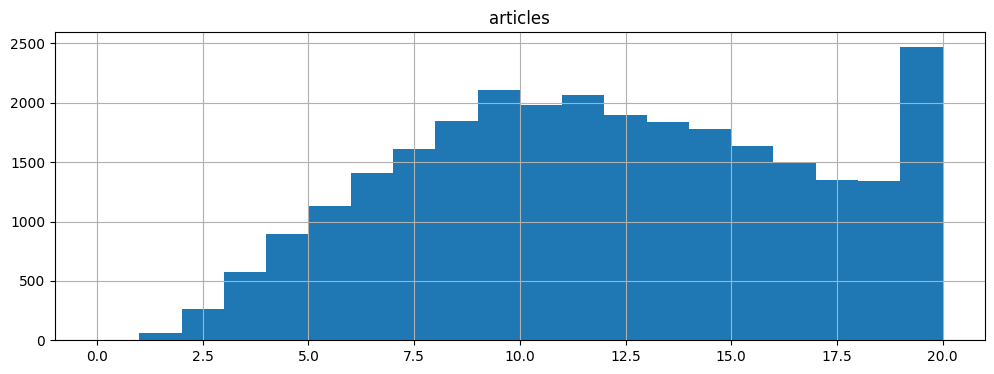

In [ ]:
tweet_word_count = [len(sentence.split()) for sentence in filterTweets.body]
tweet_word_count[:10]

# Analyze the distribution of sequences by looking at the length of the texts
pd.DataFrame({'articles': tweet_word_count}).hist(
    bins=20, figsize=(12, 4), range=[0, 20]
)
plt.show()

In [ ]:
tokenizer = Tokenizer(num_words=2500, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)
word_index = tokenizer.word_index

train_sequences = tokenizer.texts_to_sequences(X_train)
test_sequence = tokenizer.texts_to_sequences(X_test)

pad_train = pad_sequences(train_sequences)
T = pad_train.shape[1]
pad_test = pad_sequences(test_sequence,T)

# Define the model architecture
model_vec = tf.keras.Sequential([
    tf.keras.layers.Input(shape = (T,)),
    tf.keras.layers.Embedding(input_dim=len(word_index) + 1, output_dim=100, input_length=10, trainable=True),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, return_sequences=True)),
    tf.keras.layers.GlobalMaxPooling1D(),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(3, activation="softmax")
])

# Compile the model_vec
model_vec.compile(loss=loss, optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=["accuracy"])

# Define callbacks
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=10)
model_checkpoint = tf.keras.callbacks.ModelCheckpoint("model_polarity_vec.h5", save_best_only=True)

# Train the model_vec
history_subjectivity_tokenizer = model_vec.fit(pad_train, y_train, epochs=10, batch_size=16, validation_data=(pad_test, y_test), callbacks=[early_stopping, model_checkpoint])

# Evaluate the model_vec on the test set
model_vec.load_weights("model_polarity_vec.h5")
test_loss, test_acc = model_vec.evaluate(pad_test, y_test)
print("Test loss:", test_loss)
print("Test accuracy:", test_acc)

start_time = time.time()
y_pred = model_vec.predict(pad_test)
end_time = time.time()
y_pred = (y_pred >= 0.5).astype(int)
time_taken =  end_time - start_time
metric_report( y_test,y_pred,time_taken,len( y_test))

Epoch 1/10
2082/2082 [==============================] - 131s 61ms/step - loss: 0.4721 - accuracy: 0.8210 - val_loss: 0.1870 - val_accuracy: 0.9534
Epoch 2/10
2082/2082 [==============================] - 127s 61ms/step - loss: 0.2642 - accuracy: 0.9198 - val_loss: 0.1744 - val_accuracy: 0.9595
Epoch 3/10
2082/2082 [==============================] - 123s 59ms/step - loss: 0.2306 - accuracy: 0.9270 - val_loss: 0.1679 - val_accuracy: 0.9575
Epoch 4/10
2082/2082 [==============================] - 125s 60ms/step - loss: 0.1986 - accuracy: 0.9343 - val_loss: 0.1721 - val_accuracy: 0.9622
Epoch 5/10
2082/2082 [==============================] - 125s 60ms/step - loss: 0.1661 - accuracy: 0.9454 - val_loss: 0.1919 - val_accuracy: 0.9601
Epoch 6/10
2082/2082 [==============================] - 125s 60ms/step - loss: 0.1438 - accuracy: 0.9502 - val_loss: 0.2132 - val_accuracy: 0.9594
Epoch 7/10
2082/2082 [==============================] - 125s 60ms/step - loss: 0.1247 - accuracy: 0.9549 - val_loss: 0

In [ ]:
# Tokenise words by splittign them up.
tokenizer = Tokenizer(num_words=2500, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train_lemma)
# Creates a dictionary of each word.
word_index = tokenizer.word_index
#Transforms each text into a sequence of interger from the word_index dictionary
train_sequences = tokenizer.texts_to_sequences(X_train_lemma)
test_sequence = tokenizer.texts_to_sequences(X_test_lemma)

# Pad the train sequence and make sure that the test sequence are of same length
pad_train = pad_sequences(train_sequences)
T = pad_train.shape[1]
pad_test = pad_sequences(test_sequence,T)

# Define the model_lemma_vec architecture
model_lemma_vec = tf.keras.Sequential([
    tf.keras.layers.Input(shape = (T,)),
    tf.keras.layers.Embedding(input_dim=len(word_index) + 1, output_dim=100, input_length=10, trainable=True),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, return_sequences=True)),
    tf.keras.layers.GlobalMaxPooling1D(),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(3, activation="softmax") #Inclusive of Positive/Negative/Neutral -> May need to remove neutral from dataset.
])

# Compile the model_lemma_vec
model_lemma_vec.compile(loss=loss, optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=["accuracy"])

# Define callbacks
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=10)
model_checkpoint = tf.keras.callbacks.ModelCheckpoint("model_polarity_lemma_vec.h5", save_best_only=True)

# Train the model_lemma_vec
history_subjectivity_tokenizer_lemma = model_lemma_vec.fit(pad_train, y_train_lemma, epochs=10, batch_size=16, validation_data=(pad_test, y_test_lemma), callbacks=[early_stopping, model_checkpoint])

# Evaluate the model_lemma_vec on the test set
model_lemma_vec.load_weights("model_polarity_lemma_vec.h5")
test_loss, test_acc = model_lemma_vec.evaluate(pad_test, y_test_lemma)
print("Test loss:", test_loss)
print("Test accuracy:", test_acc)

start_time = time.time()
y_pred = model_lemma_vec.predict(pad_test)
end_time = time.time()
y_pred = (y_pred >= 0.5).astype(int)
time_taken =  end_time - start_time
metric_report( y_test_lemma,y_pred,time_taken,len( y_test_lemma))

Epoch 1/10
2082/2082 [==============================] - 136s 64ms/step - loss: 0.6083 - accuracy: 0.7611 - val_loss: 0.3160 - val_accuracy: 0.9085
Epoch 2/10
2082/2082 [==============================] - 135s 65ms/step - loss: 0.3809 - accuracy: 0.8806 - val_loss: 0.3167 - val_accuracy: 0.9062
Epoch 3/10
2082/2082 [==============================] - 130s 63ms/step - loss: 0.3443 - accuracy: 0.8874 - val_loss: 0.2933 - val_accuracy: 0.9165
Epoch 4/10
2082/2082 [==============================] - 133s 64ms/step - loss: 0.3170 - accuracy: 0.8932 - val_loss: 0.2967 - val_accuracy: 0.9150
Epoch 5/10
2082/2082 [==============================] - 134s 64ms/step - loss: 0.2740 - accuracy: 0.9035 - val_loss: 0.3163 - val_accuracy: 0.9141
Epoch 6/10
2082/2082 [==============================] - 135s 65ms/step - loss: 0.2517 - accuracy: 0.9137 - val_loss: 0.3514 - val_accuracy: 0.9080
Epoch 7/10
2082/2082 [==============================] - 142s 68ms/step - loss: 0.2234 - accuracy: 0.9211 - val_loss: 0

# Enhanced Classification for Sarcasm Detection Model

Importing a Kaggle Sarcasm Headlines dataset to train our model to detect sarcasm in tweets

In [ ]:
sarcasm_df = pd.read_json('Sarcasm_Headlines_Dataset_v2.json', lines = True)

In [ ]:
sarcasm_df.head()

,is_sarcastic,headline,article_link
0,1,thirtysomething scientists unveil doomsday clo...,https://www.theonion.com/thirtysomething-scien...
1,0,dem rep. totally nails why congress is falling...,https://www.huffingtonpost.com/entry/donna-edw...
2,0,eat your veggies: 9 deliciously different recipes,https://www.huffingtonpost.com/entry/eat-your-...
3,1,inclement weather prevents liar from getting t...,https://local.theonion.com/inclement-weather-p...
4,1,mother comes pretty close to using word 'strea...,https://www.theonion.com/mother-comes-pretty-c...


In [ ]:
datasetInfo(sarcasm_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28619 entries, 0 to 28618
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   is_sarcastic  28619 non-null  int64 
 1   headline      28619 non-null  object
 2   article_link  28619 non-null  object
dtypes: int64(1), object(2)
memory usage: 670.9+ KB
 Dataset Information and type 
 None
--------------------------------------------------------

 Data Types: 
is_sarcastic     int64
headline        object
article_link    object
dtype: object
--------------------------------------------------------

 Rows and Columns: 
(28619, 3)
--------------------------------------------------------

 Column Names: 
Index(['is_sarcastic', 'headline', 'article_link'], dtype='object')
--------------------------------------------------------

 Null Values: 
is_sarcastic    0.0
headline        0.0
article_link    0.0
dtype: float64
--------------------------------------------------------

 

In [ ]:
sarcasm_df["is_sarcastic"].value_counts()

0    14985
1    13634
Name: is_sarcastic, dtype: int64

### Clean the Sarcasm Dataframe text

In [ ]:
clean_dataframe_text(sarcasm_df,"headline",False)

,is_sarcastic,headline,article_link
0,1,thirtysometh scientist unveil doomsday clock h...,https://www.theonion.com/thirtysomething-scien...
1,0,dem rep total nail congress fall short gender ...,https://www.huffingtonpost.com/entry/donna-edw...
2,0,eat veggi delici differ recip,https://www.huffingtonpost.com/entry/eat-your-...
3,1,inclement weather prevent liar get work,https://local.theonion.com/inclement-weather-p...
4,1,mother come pretti close use word stream corre...,https://www.theonion.com/mother-comes-pretty-c...
...,...,...,...
28614,1,jew celebr rosh hashasha someth,https://www.theonion.com/jews-to-celebrate-ros...
28615,1,intern affair investig disappoint conspiraci d...,https://local.theonion.com/internal-affairs-in...
28616,0,beauti accept speech week came queer korean,https://www.huffingtonpost.com/entry/andrew-ah...
28617,1,mar probe destroy orbit spielbergg space palac,https://www.theonion.com/mars-probe-destroyed-...


In [ ]:
X_sarcasm = sarcasm_df["headline"].values 
y_sarcasm = sarcasm_df["is_sarcastic"].values
X_train_sarcasm, X_test_sarcasm, y_train_sarcasm, y_test_sarcasm = train_test_split(
    X_sarcasm, y_sarcasm, test_size=0.20, random_state=42)

In [ ]:
X_train_sarcasm.shape

(22895,)

In [ ]:
tokenizer = Tokenizer(num_words=2500, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train_sarcasm)
word_index = tokenizer.word_index

train_sequences = tokenizer.texts_to_sequences(X_train_sarcasm)
test_sequence = tokenizer.texts_to_sequences(X_test_sarcasm)

pad_train = pad_sequences(train_sequences)
T = pad_train.shape[1]
pad_test = pad_sequences(test_sequence,T)

max_length = max(len(seq) for seq in train_sequences)

# Define the model architecture
model_sarcasm = tf.keras.Sequential([
    tf.keras.layers.Input(shape = (T,)),
    tf.keras.layers.Embedding(input_dim=len(word_index) + 1, output_dim=100, input_length=max_length, trainable=True),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, return_sequences=True)),
    tf.keras.layers.GlobalMaxPooling1D(),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model_sarcasm
model_sarcasm.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=["accuracy"])

# Define callbacks
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=10)
model_checkpoint = tf.keras.callbacks.ModelCheckpoint("model_sarcasm.h5", save_best_only=True)

# Train the model_sarcasm
history_sarcasm = model_sarcasm.fit(pad_train, y_train_sarcasm, epochs=10, batch_size=32, validation_data=(pad_test, y_test_sarcasm), callbacks=[early_stopping, model_checkpoint])

# Evaluate the model_sarcasm on the test set
model_sarcasm.load_weights("model_sarcasm.h5")
test_loss, test_acc = model_sarcasm.evaluate(pad_test, y_test_sarcasm)
print("Test loss:", test_loss)
print("Test accuracy:", test_acc)

start_time = time.time()
y_pred = model_sarcasm.predict(pad_test)
end_time = time.time()
y_pred = (y_pred >= 0.5).astype(int)
time_taken =  end_time - start_time
metric_report(y_test_sarcasm,y_pred,time_taken,len(y_test_sarcasm))

Epoch 1/10
716/716 [==============================] - 38s 47ms/step - loss: 0.5343 - accuracy: 0.7233 - val_loss: 0.4612 - val_accuracy: 0.7755
Epoch 2/10
716/716 [==============================] - 30s 42ms/step - loss: 0.4113 - accuracy: 0.8108 - val_loss: 0.4501 - val_accuracy: 0.7828
Epoch 3/10
716/716 [==============================] - 31s 43ms/step - loss: 0.3610 - accuracy: 0.8354 - val_loss: 0.4631 - val_accuracy: 0.7802
Epoch 4/10
716/716 [==============================] - 32s 45ms/step - loss: 0.3171 - accuracy: 0.8569 - val_loss: 0.5436 - val_accuracy: 0.7780
Epoch 5/10
716/716 [==============================] - 31s 44ms/step - loss: 0.2708 - accuracy: 0.8812 - val_loss: 0.5648 - val_accuracy: 0.7736
Epoch 6/10
716/716 [==============================] - 32s 44ms/step - loss: 0.2222 - accuracy: 0.9023 - val_loss: 0.6277 - val_accuracy: 0.7701
Epoch 7/10
716/716 [==============================] - 32s 44ms/step - loss: 0.1812 - accuracy: 0.9190 - val_loss: 0.7925 - val_accuracy:

In [ ]:
filterTweetsTemp = filterTweets.copy()

In [ ]:
X_train_temp = filterTweetsTemp['body']

In [ ]:
print(len(X_train_temp))

41625


In [ ]:
# Tokenise words by splittign them up.
tokenizer = Tokenizer(num_words=2500, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train_temp)
# Creates a dictionary of each word.
word_index = tokenizer.word_index
#Transforms each text into a sequence of interger from the word_index dictionary
test_sequence_x = tokenizer.texts_to_sequences(X_train_temp)

# Pad the train sequence and make sure that the test sequence are of same length
pad_train_x = pad_sequences(test_sequence_x)


In [ ]:
sarcasm_pred = model_sarcasm.predict(pad_train_x)

1301/1301 [==============================] - 33s 25ms/step


In [ ]:
sarcasm_pred = (sarcasm_pred >= 0.5).astype(int)
print(sarcasm_pred)

[[1]
 [1]
 [1]
 ...
 [1]
 [1]
 [0]]


In [ ]:
len(sarcasm_pred)

41625

In [ ]:
filterTweetsTemp['is_sarcasm'] = sarcasm_pred

In [ ]:
filterTweetsTemp

,tweet_id,ticker_symbol,writer,post_date,body,comment_num,retweet_num,like_num,tweet_activity,clean_text,blob_subjectivity,blob_polarity_Negative,blob_polarity_Neutral,blob_polarity_Positive,is_sarcasm
3786974,1014983757252780033,TSLA,lopezlinette,2018-07-05,"I’d just like to point out that right now, rig...",631,369,0,1000,id like point right right moment elonmusk go f...,0,0,0,1,1
4112626,1118989675257978880,TSLA,GerberKawasaki,2019-04-18,"If a Tesla saves you $200 a month on gas, you ...",567,0,0,567,tesla save month ga ten year take save put bal...,0,0,0,1,1
4306536,1199424478536753155,TSLA,AlexSibila,2019-11-26,~Tesla feature request thread~Feel free to rep...,563,48,662,1273,tesla featur request threadfeel free repli ill...,1,0,0,1,1
2823018,885933344487342082,AMZN,internet_dust,2017-07-14,"""I sell books."" versus ""I sell whatever the fu...",496,0,0,496,sell book versu sell whatev fuck want amzn,1,1,0,0,1
4182686,1138975188127834112,TSLA,TeslaNY,2019-06-13,“I think it's basically financially insane to ...,442,0,0,442,think basic financi insan buy anyth except ele...,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1498488,1063566557677146112,AAPL,financialbuzz,2018-11-16,Watch Us Report LIVE from the Floor of the NYS...,0,126,80,206,watch us report live floor nyse week weekli wr...,0,0,0,1,1
1498489,1063566683720175616,AAPL,financialbuzz,2018-11-16,Watch Us Report LIVE from the Floor of the NYS...,0,86,62,148,watch us report live floor nyse week weekli wr...,0,0,0,1,1
1498490,1063566957956349952,AAPL,financialbuzz,2018-11-16,Watch Us Report LIVE from the Floor of the NYS...,0,117,41,158,watch us report live floor nyse week weekli wr...,0,0,0,1,1
1482004,1058502476406632448,AAPL,financialbuzz,2018-11-02,Watch Us Report LIVE from the Floor of the NYS...,0,155,0,155,watch us report live floor nyse week weekli wr...,0,0,0,1,1


In [ ]:
x_sarcasm_polarity = filterTweetsTemp['body']
y_sarcasm_polarity = filterTweetsTemp[['blob_polarity_Negative','blob_polarity_Positive','blob_polarity_Positive']]

X_train_sp, y_train_sp,X_test_sp, y_test_sp = train_test_split(x_sarcasm_polarity,y_sarcasm_polarity, test_size = 0.2, random_state = 0)